# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: **Brunet Mauricio**
*   Alumno 2: **Castiblanco Alexander**
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [16]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/Grupo_20_AR"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [18]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
else:
    print("Running in local", os.getcwd())
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/Grupo_20_AR  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Grupo_20_AR
/content/gdrive/My Drive/Grupo_20_AR
Archivos en el directorio: 
['dqn_SpaceInvaders-v0_weights_focused.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_weights_focused.h5f.index', 'openaigym.manifest.1.160.manifest.json', 'openaigym.video.1.160.video000000.mp4', 'openaigym.video.1.160.video000000.meta.json', 'openaigym.episode_batch.1.160.stats.json', 'Proyecto_práctico.ipynb', 'checkpoints', 'dqn_SpaceInvaders-v0_log.json', 'dqn_SpaceInvaders-v0_weights_final.h5f.index_old', 'dqn_SpaceInvaders-v0_weights_final.h5f.data-00000-of-00001_old', 'checkpoint', 'Proyecto_practico_test_en_colab.ipynb', 'Proyecto_práctico_MBrunet.ipynb', 'Proyecto_práctico_Final_

---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-mz_pbn9_
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-mz_pbn9_
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done


In [19]:
def verificar_instalacion_completa():
    """Verificación completa de todas las dependencias"""
    print("Verificando instalación completa...")

    # Verificar TensorFlow
    try:
        import tensorflow as tf
        print(f"✓ TensorFlow: {tf.__version__}")

        # Verificar que TensorFlow funcione
        test_tensor = tf.constant([1, 2, 3])
        print(f"  - Test tensor: OK")

    except Exception as e:
        print(f"✗ TensorFlow: Error - {e}")
        return False

    # Verificar Keras
    try:
        import keras
        print(f"✓ Keras: {keras.__version__}")

        # Verificar componentes específicos que usa keras-rl2
        from tensorflow.keras.models import Sequential, Model
        from tensorflow.keras.layers import Dense, Input
        print(f"  - Keras components: OK")

    except Exception as e:
        print(f"✗ Keras: Error - {e}")
        return False

    # Verificar keras-rl2 paso a paso
    print("\nVerificando keras-rl2 paso a paso...")

    try:
        # Test 1: Importar módulo principal
        import rl
        print("✓ Módulo rl importado")

        # Test 2: Importar core
        from rl.core import Agent
        print("✓ rl.core importado")

        # Test 3: Importar memory
        from rl.memory import SequentialMemory
        print("✓ rl.memory importado")

        # Test 4: Importar policy
        from rl.policy import EpsGreedyQPolicy
        print("✓ rl.policy importado")

        # Test 5: Importar agents
        from rl.agents.dqn import DQNAgent
        print("✓ rl.agents.dqn importado")

        # Test 6: Crear objetos básicos
        memory = SequentialMemory(limit=1000, window_length=1)
        policy = EpsGreedyQPolicy()
        print("✓ Objetos básicos creados")

        print("✓ keras-rl2: TOTALMENTE FUNCIONAL")

    except ImportError as e:
        print(f"✗ keras-rl2: ImportError - {e}")
        print("\nDiagnóstico detallado:")

        # Diagnóstico específico
        if "model_from_config" in str(e):
            print("- Problema: model_from_config no encontrado")
            print("- Solución: Aplicar parche o usar TensorFlow 2.6.x")
        elif "callbacks" in str(e):
            print("- Problema: Callbacks incompatibles")
            print("- Solución: Verificar versión de protobuf")

        return False

    except Exception as e:
        print(f"✗ keras-rl2: Error general - {e}")
        return False

    # Verificar otras dependencias
    try:
        import gym
        print(f"✓ Gym: {gym.__version__}")

        import numpy as np
        print(f"✓ NumPy: {np.__version__}")

        from PIL import Image
        print("✓ Pillow: OK")

        import h5py
        print(f"✓ h5py: {h5py.__version__}")

    except Exception as e:
        print(f"✗ Otras dependencias: {e}")

    print("\n" + "="*60)
    print("INSTALACIÓN COMPLETAMENTE VERIFICADA - LISTA PARA USAR")
    print("="*60)
    return True

# Ejecutar verificación completa
verificar_instalacion_completa()
# Mostrar versión de Python
import sys; print(f"Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")

Verificando instalación completa...
✓ TensorFlow: 2.12.0
  - Test tensor: OK
✓ Keras: 2.12.0
  - Keras components: OK

Verificando keras-rl2 paso a paso...
✓ Módulo rl importado
✓ rl.core importado
✓ rl.memory importado
✓ rl.policy importado
✓ rl.agents.dqn importado
✓ Objetos básicos creados
✓ keras-rl2: TOTALMENTE FUNCIONAL
✓ Gym: 0.17.3
✓ NumPy: 1.23.5
✓ Pillow: OK
✓ h5py: 3.14.0

INSTALACIÓN COMPLETAMENTE VERIFICADA - LISTA PARA USAR
Python: 3.11.13


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [20]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [21]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [22]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

## **Solución 1 (Mauricio Brunet):**

1. Implementación de la red neuronal

In [23]:
def build_model(input_shape, actions):
    """
    Construye la red neuronal convolucional para DQN

    Arquitectura basada en el paper original de DQN (Mnih et al., 2015):
    - 3 capas convolucionales para extracción de características visuales
    - 2 capas densas para aproximación de valores Q
    """
    print(f"Construyendo modelo con entrada: {input_shape}, acciones: {actions}")

    model = Sequential()

    # Reorganizar dimensiones para TensorFlow (canal al final)
    if K.image_data_format() == 'channels_last':
        model.add(Permute((2, 3, 1), input_shape=input_shape))
    elif K.image_data_format() == 'channels_first':
        model.add(Permute((1, 2, 3), input_shape=input_shape))
    else:
        raise RuntimeError('Unknown image_data_format for Keras: {}'.format(K.image_data_format()))

    # Primera capa convolucional: 32 filtros 8x8, stride 4
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), padding='valid'))
    model.add(Activation('relu'))

    # Segunda capa convolucional: 64 filtros 4x4, stride 2
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), padding='valid'))
    model.add(Activation('relu'))

    # Tercera capa convolucional: 64 filtros 3x3, stride 1
    model.add(Convolution2D(64, (3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))

    # Aplanar para capas densas
    model.add(Flatten())

    # Capa densa oculta con 512 neuronas
    model.add(Dense(512))
    model.add(Activation('relu'))

    # Capa de salida: una neurona por acción posible
    model.add(Dense(actions))
    model.add(Activation('linear'))

    # Compilar el modelo inmediatamente para evitar problemas
    model.compile(optimizer='adam', loss='mse')

    # Construir el modelo con una entrada dummy
    try:
        import tensorflow as tf
        dummy_input = tf.zeros((1,) + input_shape, dtype=tf.float32)
        _ = model(dummy_input)
        print(f"✓ Modelo construido exitosamente")
    except Exception as e:
        print(f"⚠ Advertencia al construir modelo: {e}")
        # Intentar con numpy
        try:
            dummy_input = np.zeros((1,) + input_shape, dtype=np.float32)
            _ = model.predict(dummy_input, verbose=0)
            print(f"✓ Modelo construido con predict")
        except Exception as e2:
            print(f"⚠ No se pudo pre-construir el modelo: {e2}")

    print("Arquitectura del modelo:")
    try:
        print(model.summary())
    except:
        print("No se pudo mostrar el resumen del modelo")

    return model

# Crear el modelo
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = build_model(input_shape, nb_actions)

# IMPORTANTE: Compilar y construir el modelo para evitar errores de atributos
print("Compilando modelo...")
model.compile(optimizer='adam', loss='mse')

# Construir el modelo con una entrada dummy para definir la forma
print("Construyendo modelo con entrada dummy...")
import tensorflow as tf
dummy_input = tf.zeros((1,) + input_shape)
_ = model(dummy_input)
print(f"✓ Modelo construido. Forma de salida: {model.output_shape}")
print(f"✓ Número de parámetros: {model.count_params():,}")

Construyendo modelo con entrada: (4, 84, 84), acciones: 6
✓ Modelo construido exitosamente
Arquitectura del modelo:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_2 (Permute)         (None, 84, 84, 4)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 32)        8224      
                                                                 
 activation_10 (Activation)  (None, 20, 20, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 activation_11 (Activation)  (None, 9, 9, 64)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          36928     
    

2. Implementación de la solución DQN

In [24]:
import os
import json
import time
from datetime import datetime

In [25]:
# ==================== SISTEMA DE CHECKPOINTS ====================
# Para facilitar el entrenamiento en etapas y administrar los archivos de checkpoints.

class CheckpointManager:
    def __init__(self, env_name, base_dir='checkpoints'):
        self.env_name = env_name
        self.base_dir = base_dir
        self.checkpoint_dir = os.path.join(base_dir, env_name)
        self.metadata_file = os.path.join(self.checkpoint_dir, 'training_metadata.json')

        # Crear directorio si no existe
        os.makedirs(self.checkpoint_dir, exist_ok=True)

    def save_checkpoint(self, dqn, step, episode, total_steps, epsilon):
        """Guarda un checkpoint completo del entrenamiento"""
        checkpoint_data = {
            'step': step,
            'episode': episode,
            'total_steps': total_steps,
            'epsilon': epsilon,
            'timestamp': datetime.now().isoformat(),
            'weights_file': f'weights_step_{total_steps}.h5f'
        }

        # Guardar pesos en el directorio de checkpoints
        weights_path = os.path.join(self.checkpoint_dir, checkpoint_data['weights_file'])
        try:
            dqn.save_weights(weights_path, overwrite=True)
        except Exception as e:
            print(f"Warning: No se pudo guardar en checkpoints, guardando en directorio actual: {e}")
            # Fallback: guardar en directorio actual
            weights_path = f'dqn_{self.env_name}_weights_{total_steps}.h5f'
            dqn.save_weights(weights_path, overwrite=True)
            checkpoint_data['weights_file'] = weights_path

        # Guardar metadata
        try:
            with open(self.metadata_file, 'w') as f:
                json.dump(checkpoint_data, f, indent=2)
        except Exception as e:
            print(f"Warning: No se pudo guardar metadata: {e}")

        print(f"✓ Checkpoint guardado en paso {total_steps} (episodio {episode})")
        return checkpoint_data

    def load_checkpoint(self, dqn):
        """Carga el último checkpoint disponible"""
        # Buscar el archivo de pesos más reciente
        best_weights_path, best_steps = self._find_latest_weights()

        if not best_weights_path:
            print("No se encontró checkpoint previo. Iniciando entrenamiento desde cero.")
            return None

        # Intentar cargar metadata si existe
        metadata = None
        if os.path.exists(self.metadata_file):
            try:
                with open(self.metadata_file, 'r') as f:
                    metadata = json.load(f)
            except:
                pass

        # Cargar los pesos
        try:
            dqn.load_weights(best_weights_path)

            # Usar pasos del archivo si metadata no coincide o no existe
            actual_steps = best_steps if best_steps != 999999 else (metadata['total_steps'] if metadata else 0)

            print(f"✓ Checkpoint cargado desde: {best_weights_path}")
            print(f"  - Pasos: {actual_steps:,}")

            if metadata:
                # Verificar consistencia
                if actual_steps > metadata['total_steps']:
                    print(f"  - ⚠ Archivo más reciente ({actual_steps:,}) que metadata ({metadata['total_steps']:,})")
                    # Actualizar metadata con información real
                    metadata['total_steps'] = actual_steps
                    metadata['step'] = actual_steps

                print(f"  - Epsilon: {metadata['epsilon']:.4f}")
                print(f"  - Fecha: {metadata['timestamp']}")
            else:
                # Crear metadata básica si no existe
                progress = min(actual_steps / 1000000, 1.0)
                estimated_epsilon = max(1.0 - progress * (1.0 - 0.1), 0.1)
                metadata = {
                    'total_steps': actual_steps,
                    'step': actual_steps,
                    'episode': 0,
                    'epsilon': estimated_epsilon,
                    'timestamp': datetime.now().isoformat()
                }
                print(f"  - Epsilon estimado: {estimated_epsilon:.4f}")

            return metadata

        except Exception as e:
            print(f"⚠ Error cargando pesos desde {best_weights_path}: {e}")
            return None

    def list_checkpoints(self):
        """Lista todos los checkpoints disponibles"""
        weight_files = []

        # Buscar en directorio actual
        try:
            current_files = [f for f in os.listdir('.') if f.endswith('.h5f.index') and self.env_name in f]
            for f in current_files:
                steps = self._extract_steps_from_filename(f)
                if steps > 0 and steps != 999999:  # Excluir archivos "final"
                    weight_files.append(steps)
        except:
            pass

        # Buscar en directorio de checkpoints
        try:
            if os.path.exists(self.checkpoint_dir):
                checkpoint_files = [f for f in os.listdir(self.checkpoint_dir) if f.endswith('.h5f.index')]
                for f in checkpoint_files:
                    steps = self._extract_steps_from_filename(f)
                    if steps > 0 and steps != 999999:  # Excluir archivos "final"
                        weight_files.append(steps)
        except:
            pass

        # Remover duplicados
        unique_steps = list(set(weight_files))
        return sorted(unique_steps, reverse=True)

    def _find_latest_weights(self):
        """Encuentra el archivo de pesos más reciente en cualquier ubicación"""
        weight_files = []

        print("Debug: Buscando archivos de pesos...")  # Debug temporal

        # Buscar en directorio actual
        try:
            all_files = os.listdir('.')
            print(f"Debug: Archivos en directorio actual: {len(all_files)}")  # Debug temporal

            # Filtrar archivos que contienen el nombre del entorno y terminan en .h5f.index
            current_files = []
            for f in all_files:
                if f.endswith('.h5f.index') and 'SpaceInvaders' in f:
                    current_files.append(f)
                    print(f"Debug: Archivo candidato encontrado: {f}")  # Debug temporal

            print(f"Debug: Archivos .h5f.index de SpaceInvaders encontrados: {current_files}")  # Debug temporal

            for f in current_files:
                if os.path.exists(f):
                    steps = self._extract_steps_from_filename(f)
                    if steps > 0:  # Solo considerar archivos con pasos válidos
                        # El archivo real de pesos es sin .index
                        weight_file = f.replace('.index', '')
                        weight_files.append({
                            'path': weight_file,  # Archivo sin .index para cargar
                            'steps': steps,
                            'mtime': os.path.getmtime(f),  # Usar .index para fecha
                            'size': os.path.getsize(f)
                        })
                        print(f"Debug: Archivo válido agregado: {weight_file} ({steps} pasos)")  # Debug temporal
        except Exception as e:
            print(f"Debug: Error buscando en directorio actual: {e}")  # Debug temporal

        # Buscar en directorio de checkpoints
        try:
            if os.path.exists(self.checkpoint_dir):
                checkpoint_files = [f for f in os.listdir(self.checkpoint_dir) if f.endswith('.h5f.index')]
                print(f"Debug: Archivos en checkpoints: {checkpoint_files}")  # Debug temporal

                for f in checkpoint_files:
                    path = os.path.join(self.checkpoint_dir, f)
                    if os.path.exists(path):
                        steps = self._extract_steps_from_filename(f)
                        if steps > 0:
                            # El archivo real está sin .index
                            weight_file = path.replace('.index', '')
                            weight_files.append({
                                'path': weight_file,
                                'steps': steps,
                                'mtime': os.path.getmtime(path),
                                'size': os.path.getsize(path)
                            })
        except Exception as e:
            print(f"Debug: Error buscando en checkpoints: {e}")  # Debug temporal

        print(f"Debug: Total archivos válidos encontrados: {len(weight_files)}")  # Debug temporal

        if not weight_files:
            print("Debug: No se encontraron archivos de pesos válidos")  # Debug temporal
            return None, 0

        # Ordenar por pasos (más alto primero), luego por tiempo
        weight_files.sort(key=lambda x: (x['steps'], x['mtime']), reverse=True)
        best = weight_files[0]

        print(f"Debug: Mejor archivo seleccionado: {best['path']} ({best['steps']} pasos)")  # Debug temporal

        return best['path'], best['steps']

    def _extract_steps_from_filename(self, filename):
        """Extrae el número de pasos del nombre del archivo"""
        try:
            if 'final' in filename:
                return 999999  # Valor alto para archivos finales

            # Buscar patrón específico para archivos de TensorFlow checkpoint
            import re

            # Patrones específicos para archivos .h5f.index y .h5f.data
            patterns = [
                r'_weights_(\d+)\.h5f\.index',   # dqn_SpaceInvaders-v0_weights_400000.h5f.index
                r'_weights_(\d+)\.h5f\.data',    # dqn_SpaceInvaders-v0_weights_400000.h5f.data-*
                r'_weights_(\d+)\.h5f',          # dqn_SpaceInvaders-v0_weights_400000.h5f
                r'weights_(\d+)\.h5f',           # weights_400000.h5f
                r'(\d+)\.h5f'                    # 400000.h5f
            ]

            for pattern in patterns:
                match = re.search(pattern, filename)
                if match:
                    steps = int(match.group(1))
                    print(f"Debug: Archivo {filename} -> {steps} pasos")  # Debug temporal
                    return steps

            print(f"Debug: No se pudo extraer pasos de: {filename}")  # Debug temporal
            return 0
        except Exception as e:
            print(f"Debug: Error procesando {filename}: {e}")  # Debug temporal
            return 0

In [27]:
checkpoint_manager = CheckpointManager(env_name)
best_path, best_steps = checkpoint_manager._find_latest_weights()
print(f"Detectado: {best_path}")

Debug: Buscando archivos de pesos...
Debug: Archivos en directorio actual: 17
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_final.h5f.index
Debug: Archivos .h5f.index de SpaceInvaders encontrados: ['dqn_SpaceInvaders-v0_weights_focused.h5f.index', 'dqn_SpaceInvaders-v0_weights_final.h5f.index']
Debug: No se pudo extraer pasos de: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo válido agregado: dqn_SpaceInvaders-v0_weights_final.h5f (999999 pasos)
Debug: Archivos en checkpoints: ['weights_step_200000.h5f.index']
Debug: Archivo weights_step_200000.h5f.index -> 200000 pasos
Debug: Total archivos válidos encontrados: 2
Debug: Mejor archivo seleccionado: dqn_SpaceInvaders-v0_weights_final.h5f (999999 pasos)
Detectado: dqn_SpaceInvaders-v0_weights_final.h5f


In [28]:
# ==================== CONFIGURACIÓN DE ENTRENAMIENTO POR ETAPAS ====================

def setup_training_session(continue_training=True, target_total_steps=1750000):
    """
    Configura una sesión de entrenamiento con soporte para checkpoints

    Args:
        continue_training: Si True, intenta cargar el último checkpoint
        target_total_steps: Número total de pasos objetivo
    """

    # Configuración de la memoria de experiencias
    memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

    # Configuración del procesador para Atari
    processor = AtariProcessor()

    # Inicializar checkpoint manager
    checkpoint_manager = CheckpointManager(env_name)

    # Configurar política inicial (se ajustará después según el checkpoint)
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
                                  nb_steps=1000000)

    # Configuración del agente DQN
    dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
                   processor=processor, nb_steps_warmup=50000, gamma=.99, target_model_update=10000,
                   train_interval=4, delta_clip=1.)

    # Compilar el agente
    dqn.compile(Adam(lr=.00025), metrics=['mae'])

    # Intentar cargar checkpoint si se solicita
    checkpoint_data = None
    steps_completed = 0

    if continue_training:
        checkpoint_data = checkpoint_manager.load_checkpoint(dqn)
        if checkpoint_data:
            steps_completed = checkpoint_data['total_steps']

            # Ajustar la política de exploración según el progreso REAL
            if steps_completed > 0:
                # Calcular progreso en el annealing de epsilon (1M pasos total para annealing)
                annealing_progress = min(steps_completed / 1000000, 1.0)

                # Calcular epsilon actual: va de 1.0 a 0.1 en 1M pasos
                current_eps = max(1.0 - annealing_progress * (1.0 - 0.1), 0.1)

                # Ajustar la política directamente
                policy.value_max = current_eps
                policy.value = current_eps  # Valor actual

                print(f"✓ Epsilon ajustado según progreso real:")
                print(f"  - Pasos completados: {steps_completed:,}")
                print(f"  - Progreso annealing: {annealing_progress*100:.1f}%")
                print(f"  - Epsilon actual: {current_eps:.4f}")
            else:
                print(f"✓ Iniciando desde epsilon máximo: 1.0")

    return dqn, checkpoint_manager, steps_completed, target_total_steps

def train_session(dqn, checkpoint_manager, steps_completed, target_total_steps,
                  session_steps=400000, save_interval=100000):
    """
    Entrena el agente por un número específico de pasos

    Args:
        dqn: Agente DQN configurado
        checkpoint_manager: Manejador de checkpoints
        steps_completed: Pasos ya completados
        target_total_steps: Objetivo total de pasos
        session_steps: Pasos a entrenar en esta sesión
        save_interval: Intervalo para guardar checkpoints automáticos
    """

    remaining_steps = target_total_steps - steps_completed
    steps_this_session = min(session_steps, remaining_steps)

    if steps_this_session <= 0:
        print("✓ Entrenamiento completado. No hay más pasos por entrenar.")
        return

    print(f"\n{'='*60}")
    print(f"INICIANDO SESIÓN DE ENTRENAMIENTO")
    print(f"{'='*60}")
    print(f"Pasos completados: {steps_completed:,}")
    print(f"Pasos objetivo total: {target_total_steps:,}")
    print(f"Pasos restantes: {remaining_steps:,}")
    print(f"Pasos esta sesión: {steps_this_session:,}")
    print(f"Progreso: {(steps_completed/target_total_steps)*100:.1f}%")

    # Configurar archivos de salida
    weights_filename = f'dqn_{env_name}_weights_final.h5f'
    log_filename = f'dqn_{env_name}_log.json'

    # Callback personalizado para checkpoints automáticos mejorado
    class AutoCheckpoint:
        def __init__(self, checkpoint_manager, interval, initial_steps):
            self.checkpoint_manager = checkpoint_manager
            self.interval = interval
            self.last_save = initial_steps  # Empezar desde pasos ya completados
            self.initial_steps = initial_steps
            self.step_count = 0

        def on_step_end(self, step, logs):
            # Incrementar contador de pasos en esta sesión
            self.step_count = step
            total_step = self.initial_steps + step

            # Verificar si es momento de guardar checkpoint
            if total_step - self.last_save >= self.interval:
                try:
                    # Obtener epsilon actual del agente
                    epsilon = getattr(dqn.policy, 'value', 0.1)
                    episode = getattr(logs, 'episode', 0)

                    print(f"\n💾 Guardando checkpoint automático en paso {total_step:,}")

                    # Guardar checkpoint usando nuestro sistema
                    self.checkpoint_manager.save_checkpoint(dqn, step, episode, total_step, epsilon)

                    self.last_save = total_step
                    print(f"✅ Checkpoint guardado exitosamente")

                except Exception as e:
                    print(f"⚠️ Error guardando checkpoint automático: {e}")

    auto_checkpoint = AutoCheckpoint(checkpoint_manager, save_interval, steps_completed)

    # Configurar callbacks estándar - ESTOS SON LOS QUE GUARDAN ARCHIVOS INTERMEDIOS
    checkpoint_callback = ModelIntervalCheckpoint(
        f'dqn_{env_name}_weights_{{step}}.h5f',
        interval=save_interval
    )

    log_callback = FileLogger(log_filename, interval=100)

    # IMPORTANTE: Agregar el callback personalizado A LA LISTA
    callbacks = [checkpoint_callback, log_callback]

    start_time = time.time()

    try:
        print(f"🚀 Entrenando por {steps_this_session:,} pasos...")
        print(f"💾 Checkpoints automáticos cada {save_interval:,} pasos")
        print(f"📁 Archivos se guardarán como: dqn_{env_name}_weights_[PASO].h5f")

        # Crear callback personalizado que funcione con keras-rl2
        class CustomCallback:
            def __init__(self, auto_checkpoint):
                self.auto_checkpoint = auto_checkpoint

            def on_step_end(self, step, logs=None):
                self.auto_checkpoint.on_step_end(step, logs or {})

        custom_callback = CustomCallback(auto_checkpoint)

        # Agregar callback personalizado si es posible
        if hasattr(dqn, 'on_step_end'):
            original_on_step_end = dqn.on_step_end

            def enhanced_on_step_end(step, logs):
                # Llamar función original si existe
                if original_on_step_end:
                    original_on_step_end(step, logs)
                # Llamar nuestro callback
                custom_callback.on_step_end(step, logs)

            dqn.on_step_end = enhanced_on_step_end

        # Entrenar
        history = dqn.fit(env, callbacks=callbacks, nb_steps=steps_this_session,
                         log_interval=10000, verbose=1)

        # Calcular pasos finales de la sesión
        final_steps = steps_completed + steps_this_session

        # Guardar checkpoint final de la sesión usando nuestro sistema
        epsilon = getattr(dqn.policy, 'value', 0.1)
        print(f"\n💾 Guardando checkpoint final de la sesión...")
        checkpoint_manager.save_checkpoint(dqn, steps_this_session, 0, final_steps, epsilon)

        # Guardar pesos finales (archivo "final")
        print(f"💾 Guardando archivo final: {weights_filename}")
        dqn.save_weights(weights_filename, overwrite=True)

        elapsed_time = time.time() - start_time
        progress_pct = (final_steps / target_total_steps) * 100

        print(f"\n✅ SESIÓN COMPLETADA EXITOSAMENTE")
        print(f"⏱️  Tiempo transcurrido: {elapsed_time/3600:.2f} horas")
        print(f"🎯 Pasos totales completados: {final_steps:,}")
        print(f"📈 Progreso total: {progress_pct:.1f}%")
        print(f"🎛️  Epsilon final: {epsilon:.4f}")

        # Mostrar archivos guardados
        print(f"\n📁 ARCHIVOS GUARDADOS:")
        print(f"  📄 Archivo final: {weights_filename}")

        # Listar checkpoints intermedios creados
        current_checkpoints = checkpoint_manager.list_checkpoints()
        if current_checkpoints:
            print(f"  📄 Checkpoints intermedios: {current_checkpoints}")

        if final_steps >= target_total_steps:
            print(f"🎉 ¡ENTRENAMIENTO COMPLETADO! Objetivo alcanzado.")
        else:
            remaining = target_total_steps - final_steps
            estimated_hours = (remaining / steps_this_session) * (elapsed_time / 3600)
            print(f"⏳ Tiempo estimado restante: {estimated_hours:.1f} horas")

        return history

    except KeyboardInterrupt:
        print(f"\n⚠️  Entrenamiento interrumpido por el usuario")

        # Calcular pasos actuales al momento de interrupción
        current_step = getattr(auto_checkpoint, 'step_count', 0)
        current_total_steps = steps_completed + current_step
        epsilon = getattr(dqn.policy, 'value', 0.1)

        # Guardar checkpoint de emergencia
        print(f"💾 Guardando checkpoint de emergencia...")
        checkpoint_manager.save_checkpoint(dqn, current_step, 0, current_total_steps, epsilon)

        # Guardar pesos actuales
        emergency_filename = f'dqn_{env_name}_weights_emergency_{current_total_steps}.h5f'
        dqn.save_weights(emergency_filename, overwrite=True)

        elapsed_time = time.time() - start_time
        print(f"💾 Checkpoint de emergencia guardado:")
        print(f"  - Pasos: {current_total_steps:,}")
        print(f"  - Archivo: {emergency_filename}")
        print(f"  - Tiempo entrenado: {elapsed_time/60:.1f} minutos")

        raise

    except Exception as e:
        print(f"\n❌ Error durante el entrenamiento: {e}")

        # Intentar guardar estado actual
        try:
            current_step = getattr(auto_checkpoint, 'step_count', 0)
            current_total_steps = steps_completed + current_step
            epsilon = getattr(dqn.policy, 'value', 0.1)

            checkpoint_manager.save_checkpoint(dqn, current_step, 0, current_total_steps, epsilon)
            print(f"💾 Estado guardado en paso {current_total_steps:,}")
        except:
            print("❌ No se pudo guardar estado de emergencia")

        raise

In [29]:
# ==================== COMENZAR EL ENTRENAMIENTO DEL MODELO ====================

# CONFIGURACIÓN: Cambiar estos parámetros según necesidades
CONTINUE_TRAINING = True  # True para continuar, False para empezar desde cero
TARGET_TOTAL_STEPS = 1750000  # Objetivo total de pasos
SESSION_STEPS = 200000  # Pasos por sesión (aproximadamente 2 horas)
CHECKPOINT_INTERVAL = 100000  # Guardar checkpoint cada X pasos

print("Configurando sesión de entrenamiento...")
dqn, checkpoint_manager, steps_completed, target_total_steps = setup_training_session(
    continue_training=CONTINUE_TRAINING,
    target_total_steps=TARGET_TOTAL_STEPS
)

print(f"\nEntorno: {env_name}")
print(f"Número de acciones: {nb_actions}")
print(f"Forma de entrada: {input_shape}")

# ==================== ENTRENAMIENTO POR SESIONES - PRIMERA SESIÓN ====================

print(f"\nCheckpoints disponibles: {checkpoint_manager.list_checkpoints()}")

# Entrenar una sesión
history = train_session(
    dqn=dqn,
    checkpoint_manager=checkpoint_manager,
    steps_completed=steps_completed,
    target_total_steps=target_total_steps,
    session_steps=SESSION_STEPS,
    save_interval=CHECKPOINT_INTERVAL
)

Configurando sesión de entrenamiento...


/usr/local/lib/python3.11/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Debug: Buscando archivos de pesos...
Debug: Archivos en directorio actual: 17
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_final.h5f.index
Debug: Archivos .h5f.index de SpaceInvaders encontrados: ['dqn_SpaceInvaders-v0_weights_focused.h5f.index', 'dqn_SpaceInvaders-v0_weights_final.h5f.index']
Debug: No se pudo extraer pasos de: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo válido agregado: dqn_SpaceInvaders-v0_weights_final.h5f (999999 pasos)
Debug: Archivos en checkpoints: ['weights_step_200000.h5f.index']
Debug: Archivo weights_step_200000.h5f.index -> 200000 pasos
Debug: Total archivos válidos encontrados: 2
Debug: Mejor archivo seleccionado: dqn_SpaceInvaders-v0_weights_final.h5f (999999 pasos)
✓ Checkpoint cargado desde: dqn_SpaceInvaders-v0_weights_final.h5f
  - Pasos: 200,000
  - Epsilon: 0.1000
  - Fecha: 2025-06-20T13:30:14.978896
✓ Epsilon ajustado según p

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1288/10000 [==>...........................] - ETA: 1:10 - reward: 0.0132done, took 10.782 seconds

💾 Guardando checkpoint final de la sesión...
✓ Checkpoint guardado en paso 400000 (episodio 0)
💾 Guardando archivo final: dqn_SpaceInvaders-v0_weights_final.h5f

✅ SESIÓN COMPLETADA EXITOSAMENTE
⏱️  Tiempo transcurrido: 0.00 horas
🎯 Pasos totales completados: 400,000
📈 Progreso total: 22.9%
🎛️  Epsilon final: 0.8200

📁 ARCHIVOS GUARDADOS:
  📄 Archivo final: dqn_SpaceInvaders-v0_weights_final.h5f
Debug: No se pudo extraer pasos de: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo weights_step_200000.h5f.index -> 200000 pasos
Debug: Archivo weights_step_400000.h5f.index -> 400000 pasos
  📄 Checkpoints intermedios: [400000, 200000]
⏳ Tiempo estimado restante: 0.0 horas


In [30]:
# ==================== FUNCIONES UTILES PARA MANEJO DE CHECKPOINTS ====================
def show_available_checkpoints():
    """Muestra información sobre checkpoints disponibles"""
    checkpoint_manager = CheckpointManager(env_name)
    best_path, best_steps = checkpoint_manager._find_latest_weights()

    print(f"\n{'='*50}")
    print(f"CHECKPOINTS DISPONIBLES")
    print(f"{'='*50}")

    if best_path:
        print(f"✅ Archivo más reciente: {os.path.basename(best_path)}")
        print(f"📊 Pasos: {best_steps:,}")
        print(f"📈 Progreso: {(best_steps/TARGET_TOTAL_STEPS)*100:.1f}%")

        # Mostrar todos los archivos disponibles
        print(f"\n📁 Todos los archivos de pesos:")
        weight_files = []
        try:
            current_files = [f for f in os.listdir('.') if f.endswith('.h5f') and env_name in f]
            for f in current_files:
                steps = checkpoint_manager._extract_steps_from_filename(f)
                weight_files.append((f, steps))
        except:
            pass

        weight_files.sort(key=lambda x: x[1], reverse=True)
        for file, steps in weight_files:
            if steps == 999999:
                print(f"  📄 {file} (final)")
            else:
                print(f"  📄 {file} ({steps:,} pasos)")
    else:
        print("❌ No se encontraron checkpoints")

    return best_steps

def continue_training_session(hours=4):
    """Continúa el entrenamiento por X horas aproximadamente"""
    steps_per_hour = 100000  # Aproximación
    session_steps = int(hours * steps_per_hour)

    print(f"Continuando entrenamiento por aproximadamente {hours} horas...")
    print(f"Pasos estimados: {session_steps:,}")

    dqn, checkpoint_manager, steps_completed, target_total_steps = setup_training_session(
        continue_training=True,
        target_total_steps=TARGET_TOTAL_STEPS
    )

    return train_session(
        dqn=dqn,
        checkpoint_manager=checkpoint_manager,
        steps_completed=steps_completed,
        target_total_steps=target_total_steps,
        session_steps=session_steps,
        save_interval=CHECKPOINT_INTERVAL
    )
def quick_test():
    """Realiza una evaluación rápida del modelo actual"""
    try:
        dqn, checkpoint_manager, _, _ = setup_training_session(continue_training=True)
        print("Evaluando modelo actual...")
        test_results = dqn.test(env, nb_episodes=5, visualize=False)
        mean_reward = np.mean(test_results.history['episode_reward'])
        print(f"Recompensa media (5 episodios): {mean_reward:.2f}")
        return mean_reward
    except Exception as e:
        print(f"Error en evaluación: {e}")
        return None

def show_training_status():
    """Muestra el estado actual del entrenamiento"""
    checkpoint_manager = CheckpointManager(env_name)

    if os.path.exists(checkpoint_manager.metadata_file):
        with open(checkpoint_manager.metadata_file, 'r') as f:
            data = json.load(f)

        progress = (data['total_steps'] / TARGET_TOTAL_STEPS) * 100
        remaining = TARGET_TOTAL_STEPS - data['total_steps']

        print(f"\n{'='*50}")
        print(f"ESTADO DEL ENTRENAMIENTO")
        print(f"{'='*50}")
        print(f"Pasos completados: {data['total_steps']:,}")
        print(f"Pasos objetivo: {TARGET_TOTAL_STEPS:,}")
        print(f"Progreso: {progress:.1f}%")
        print(f"Pasos restantes: {remaining:,}")
        print(f"Epsilon actual: {data['epsilon']:.4f}")
        print(f"Último guardado: {data['timestamp']}")
        print(f"{'='*50}")
    else:
        print("No hay entrenamiento previo. Comenzar desde cero.")

def diagnose_checkpoints():
    """Diagnostica problemas con checkpoints y archivos"""
    checkpoint_manager = CheckpointManager(env_name)

    print(f"\n{'='*60}")
    print(f"DIAGNÓSTICO DE CHECKPOINTS")
    print(f"{'='*60}")

    # Verificar directorio actual (donde están realmente los archivos)
    print(f"📁 DIRECTORIO ACTUAL:")
    current_files = [f for f in os.listdir('.') if 'SpaceInvaders' in f and f.endswith('.h5f')]
    if current_files:
        print(f"✅ Archivos de pesos encontrados en directorio actual:")
        for file in sorted(current_files):
            if os.path.exists(file):
                size = os.path.getsize(file) / (1024*1024)  # MB
                mod_time = os.path.getmtime(file)
                mod_str = datetime.fromtimestamp(mod_time).strftime('%Y-%m-%d %H:%M:%S')
                print(f"  📄 {file} ({size:.1f} MB) - {mod_str}")
    else:
        print("❌ No se encontraron archivos en directorio actual")

    # Extraer información de los archivos
    weight_info = []
    for file in current_files:
        if '_weights_' in file and '.h5f' in file:
            try:
                # Extraer número de pasos del nombre del archivo
                if 'final' in file:
                    steps = 'final'
                else:
                    parts = file.split('_')
                    for i, part in enumerate(parts):
                        if part.isdigit():
                            steps = int(part)
                            break
                    else:
                        steps = 0

                weight_info.append({
                    'file': file,
                    'steps': steps,
                    'size': os.path.getsize(file),
                    'mtime': os.path.getmtime(file)
                })
            except:
                continue

    # Ordenar por pasos (más alto primero)
    weight_info.sort(key=lambda x: x['steps'] if isinstance(x['steps'], int) else 999999, reverse=True)

    print(f"\n🎯 ANÁLISIS DE ARCHIVOS DE PESOS:")
    for info in weight_info:
        steps_str = f"{info['steps']:,}" if isinstance(info['steps'], int) else info['steps']
        mod_str = datetime.fromtimestamp(info['mtime']).strftime('%H:%M:%S')
        print(f"  🎮 {steps_str} pasos - {info['file']} ({mod_str})")

    # Verificar directorio de checkpoints
    print(f"\n📁 DIRECTORIO CHECKPOINTS:")
    print(f"Ruta: {checkpoint_manager.checkpoint_dir}")
    print(f"Existe: {os.path.exists(checkpoint_manager.checkpoint_dir)}")

    if os.path.exists(checkpoint_manager.checkpoint_dir):
        try:
            checkpoint_files = os.listdir(checkpoint_manager.checkpoint_dir)
            if checkpoint_files:
                print(f"Archivos en checkpoints:")
                for file in checkpoint_files:
                    print(f"  📄 {file}")
            else:
                print("📂 Carpeta checkpoints vacía")
        except PermissionError:
            print("❌ Sin permisos para leer carpeta checkpoints")

    # Verificar metadata
    print(f"\n📋 METADATA:")
    print(f"Archivo: {checkpoint_manager.metadata_file}")
    print(f"Existe: {os.path.exists(checkpoint_manager.metadata_file)}")

    if os.path.exists(checkpoint_manager.metadata_file):
        try:
            with open(checkpoint_manager.metadata_file, 'r') as f:
                data = json.load(f)
            print(f"📊 Según metadata:")
            print(f"  - Pasos: {data['total_steps']:,}")
            print(f"  - Epsilon: {data['epsilon']:.4f}")
            print(f"  - Archivo esperado: {data['weights_file']}")

            # Comparar con archivos reales
            if weight_info:
                latest_real = weight_info[0]
                if isinstance(latest_real['steps'], int):
                    if latest_real['steps'] > data['total_steps']:
                        print(f"⚠️  INCONSISTENCIA: Archivo más reciente ({latest_real['steps']:,}) > Metadata ({data['total_steps']:,})")
                        return latest_real['file'], latest_real['steps']

        except Exception as e:
            print(f"❌ Error leyendo metadata: {e}")

    # Retornar mejor archivo disponible
    if weight_info:
        best = weight_info[0]
        return best['file'], best['steps']

    return None, 0

def continue_training_session(hours=4):
    """Continúa el entrenamiento por X horas aproximadamente"""
    steps_per_hour = 100000  # Aproximación
    session_steps = int(hours * steps_per_hour)

    print(f"Continuando entrenamiento por aproximadamente {hours} horas...")
    print(f"Pasos estimados: {session_steps:,}")

    dqn, checkpoint_manager, steps_completed, target_total_steps = setup_training_session(
        continue_training=True,
        target_total_steps=TARGET_TOTAL_STEPS
    )

    return train_session(
        dqn=dqn,
        checkpoint_manager=checkpoint_manager,
        steps_completed=steps_completed,
        target_total_steps=target_total_steps,
        session_steps=session_steps,
        save_interval=CHECKPOINT_INTERVAL
    )

In [ ]:
# ==================== CONTINUAR ENTRENAMIENTO DESDE CHECKPOINT ====================

# Ver estado actual
print(env_name)
show_training_status()

# Entrenar 4 horas más
continue_training_session(hours=2)

# Evaluación rápida
#quick_test()

SpaceInvaders-v0

ESTADO DEL ENTRENAMIENTO
Pasos completados: 1,750,000
Pasos objetivo: 1,750,000
Progreso: 100.0%
Pasos restantes: 0
Epsilon actual: 0.1000
Último guardado: 2025-06-20T04:25:57.548326
Continuando entrenamiento por aproximadamente 2 horas...
Pasos estimados: 200,000
Debug: Buscando archivos de pesos...
Debug: Archivos en directorio actual: 34
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_400000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_300000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_100000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_200000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_final.h5f.index
Debug: Archivos .h5f.index de SpaceInvaders encontrados: ['dqn_SpaceInvaders-v0_weights_400000.h5f.index', 'dqn_SpaceInvaders-v0_weights_3000

2025-06-20 12:21:02.682183: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_2_3/kernel/Assign' id:1054 op device:{requested: '', assigned: ''} def:{{{node conv2d_2_3/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_2_3/kernel, conv2d_2_3/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-20 12:21:02.846337: W tensorflow/c/c_api.cc:300] Operation '{name:'total_11/Assign' id:1246 op device:{requested: '', assigned: ''} def:{{{node total_11/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total_11, total_11/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an er

In [ ]:
# ==================== EJECUTAR SI EL MODELO YA FUE ENTRENADO PARA CARGAR ULTIMO ENTRENAMIENTO ====================

# CONFIGURACIÓN: Cambiar estos parámetros según necesidades
CONTINUE_TRAINING = True  # True para continuar, False para empezar desde cero
TARGET_TOTAL_STEPS = 1750000  # Objetivo total de pasos
SESSION_STEPS = 200000  # Pasos por sesión (aproximadamente 2 horas)
CHECKPOINT_INTERVAL = 100000  # Guardar checkpoint cada X pasos

print("Configurando sesión de entrenamiento...")
dqn, checkpoint_manager, steps_completed, target_total_steps = setup_training_session(
    continue_training=CONTINUE_TRAINING,
    target_total_steps=TARGET_TOTAL_STEPS
)

print(f"\nEntorno: {env_name}")
print(f"Número de acciones: {nb_actions}")
print(f"Forma de entrada: {input_shape}")

Configurando sesión de entrenamiento...


/opt/conda/lib/python3.11/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-06-30 13:48:35.762800: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2025-06-30 13:48:35.806464: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_1/bias/Assign' id:120 op device:{requested: '', assigned: ''} def:{{{node dense_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1/bias, dense_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Debug: Buscando archivos de pesos...
Debug: Archivos en directorio actual: 39
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_400000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_300000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_100000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_focused.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_200000.h5f.index
Debug: Archivo candidato encontrado: dqn_SpaceInvaders-v0_weights_final.h5f.index
Debug: Archivos .h5f.index de SpaceInvaders encontrados: ['dqn_SpaceInvaders-v0_weights_400000.h5f.index', 'dqn_SpaceInvaders-v0_weights_300000.h5f.index', 'dqn_SpaceInvaders-v0_weights_100000.h5f.index', 'dqn_SpaceInvaders-v0_weights_focused.h5f.index', 'dqn_SpaceInvaders-v0_weights_200000.h5f.index', 'dqn_SpaceInvaders-v0_weights_final.h5f.index']
Debug: Archivo dqn_SpaceInvaders-v0_weights_400000.h5f.index -> 400000 p

2025-06-30 13:48:36.147788: W tensorflow/c/c_api.cc:300] Operation '{name:'total_1/Assign' id:470 op device:{requested: '', assigned: ''} def:{{{node total_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total_1, total_1/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [ ]:
# ==================== EVALUACIÓN ====================

print("Evaluando el modelo entrenado...")

# PARA EVITAR ERROR CUANDO EL MODELO YA ESTA ENTRENADO Y LA VARIABLE NO ES DEFINIDA
weights_filename = "dqn_SpaceInvaders-v0_weights_final.h5f"

# Cargar los mejores pesos
dqn.load_weights(weights_filename)

# Evaluar el agente en 10 episodios
test_results = dqn.test(env, nb_episodes=10, visualize=False)

print(f"Recompensa media en test: {np.mean(test_results.history['episode_reward']):.2f}")
print(f"Desviación estándar: {np.std(test_results.history['episode_reward']):.2f}")
print(f"Recompensa máxima: {np.max(test_results.history['episode_reward'])}")
print(f"Recompensa mínima: {np.min(test_results.history['episode_reward'])}")


Evaluando el modelo entrenado...
Testing for 10 episodes ...


/opt/conda/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2025-06-30 13:48:47.112714: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Episode 1: reward: 12.000, steps: 941
Episode 2: reward: 6.000, steps: 368
Episode 3: reward: 12.000, steps: 629
Episode 4: reward: 16.000, steps: 519
Episode 5: reward: 19.000, steps: 888
Episode 6: reward: 17.000, steps: 785
Episode 7: reward: 11.000, steps: 844
Episode 8: reward: 15.000, steps: 677
Episode 9: reward: 15.000, steps: 628
Episode 10: reward: 19.000, steps: 1109
Recompensa media en test: 14.20
Desviación estándar: 3.82
Recompensa máxima: 19.0
Recompensa mínima: 6.0


### **Objetivo aún no alcanzado. INTENTO de Optimización 1**
#### Probar diferentes valores de Epsilon

In [ ]:
# # ==================== INTENTO DE OPTIMIZAR RESULTADO 1 ====================
# Probar diferentes valores de epsilon
print("\n🎛️ PROBANDO DIFERENTES VALORES DE EPSILON")
print("="*50)

epsilons = [0.01, 0.02, 0.05, 0.1]
results = {}

for eps in epsilons:
    print(f"\n🧪 Probando epsilon = {eps}")
    dqn.policy.value = eps

    test_results = dqn.test(env, nb_episodes=5, visualize=False)
    mean_reward = np.mean(test_results.history['episode_reward'])

    results[eps] = mean_reward
    print(f"   📊 Media: {mean_reward:.2f}")

best_eps = max(results, key=results.get)
best_mean = results[best_eps]

print(f"\n🏆 MEJOR EPSILON: {best_eps}")
print(f"🏆 MEJOR MEDIA: {best_mean:.2f}")

# Configurar el mejor epsilon
dqn.policy.value = best_eps
print(f"✅ Epsilon configurado a {best_eps}")

# Evaluar el agente en 10 episodios
test_results = dqn.test(env, nb_episodes=10, visualize=False)

print(f"Recompensa media en test: {np.mean(test_results.history['episode_reward']):.2f}")
print(f"Desviación estándar: {np.std(test_results.history['episode_reward']):.2f}")
print(f"Recompensa máxima: {np.max(test_results.history['episode_reward'])}")
print(f"Recompensa mínima: {np.min(test_results.history['episode_reward'])}")


🎛️ PROBANDO DIFERENTES VALORES DE EPSILON

🧪 Probando epsilon = 0.01
Testing for 5 episodes ...
Episode 1: reward: 10.000, steps: 615
Episode 2: reward: 16.000, steps: 955
Episode 3: reward: 19.000, steps: 753
Episode 4: reward: 9.000, steps: 589
Episode 5: reward: 11.000, steps: 636
   📊 Media: 13.00

🧪 Probando epsilon = 0.02
Testing for 5 episodes ...
Episode 1: reward: 28.000, steps: 1080
Episode 2: reward: 22.000, steps: 987
Episode 3: reward: 9.000, steps: 796
Episode 4: reward: 13.000, steps: 614
Episode 5: reward: 8.000, steps: 402
   📊 Media: 16.00

🧪 Probando epsilon = 0.05
Testing for 5 episodes ...
Episode 1: reward: 24.000, steps: 1031
Episode 2: reward: 21.000, steps: 934
Episode 3: reward: 13.000, steps: 755
Episode 4: reward: 6.000, steps: 618
Episode 5: reward: 17.000, steps: 744
   📊 Media: 16.20

🧪 Probando epsilon = 0.1
Testing for 5 episodes ...
Episode 1: reward: 13.000, steps: 761
Episode 2: reward: 11.000, steps: 700
Episode 3: reward: 11.000, steps: 535
Episod

### **Objetivo aún no alcanzado. INTENTO de Optimización 2**
#### Entrenamiento enfocado

In [ ]:
# # ==================== INTENTO DE OPTIMIZAR RESULTADO 2 ====================
# Entrenamiento enfocado
from tensorflow.keras.optimizers.legacy import Adam

print("\n🎯 ENTRENAMIENTO ENFOCADO")
print("="*50)

# QUITAR COMENTARIOS EN LAS LINEAS SIGUIENTES PARA VOLVER A ENTRENAR
# # Configurar para fine-tuning
# dqn.policy.value = 0.02  # Muy poca exploración
# dqn.compile(Adam(lr=0.0001), metrics=['mae'])  # Learning rate bajo

# print("🚀 Entrenando 200K pasos adicionales...")
# history = dqn.fit(env, nb_steps=200000, log_interval=10000, verbose=1)

# # Guardar resultado
# dqn.save_weights('dqn_SpaceInvaders-v0_weights_focused.h5f', overwrite=True)
# print("💾 Modelo guardado como: dqn_SpaceInvaders-v0_weights_focused.h5f")


🎯 ENTRENAMIENTO ENFOCADO


/opt/conda/lib/python3.11/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-06-20 04:49:12.002014: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_10/kernel/Assign' id:4541 op device:{requested: '', assigned: ''} def:{{{node conv2d_10/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_10/kernel, conv2d_10/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


🚀 Entrenando 200K pasos adicionales...
Training for 200000 steps ...
Interval 1 (0 steps performed)


/opt/conda/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2025-06-20 04:49:12.288455: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-20 04:49:12.373303: W tensorflow/c/c_api.cc:300] Operation '{name:'count_28/Assign' id:4756 op device:{requested: '', assigned: ''} def:{{{node count_28/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype

10000/10000 [==============================] - 30s 3ms/step - reward: 0.0177
15 episodes - episode_reward: 11.333 [2.000, 22.000] - ale.lives: 2.111

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 0.0178
14 episodes - episode_reward: 12.643 [6.000, 26.000] - ale.lives: 2.182

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 29s 3ms/step - reward: 0.0168
15 episodes - episode_reward: 11.600 [8.000, 18.000] - ale.lives: 2.107

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 0.0191
14 episodes - episode_reward: 13.429 [2.000, 25.000] - ale.lives: 2.114

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 0.0181
15 episodes - episode_reward: 12.200 [3.000, 22.000] - ale.lives: 2.119

Interval 6 (50000 steps performed)
    1/10000 [..............................] - ETA: 2:52 - reward: 0.0000e+

2025-06-20 04:51:42.026228: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4_8/activation_4/Identity' id:4650 op device:{requested: '', assigned: ''} def:{{{node activation_4_8/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_8/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-20 04:51:42.257822: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_33/AddN' id:4882 op device:{requested: '', assigned: ''} def:{{{node loss_33/AddN}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss_33/mul, loss_33/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-20 04:51:42.365730

10000/10000 [==============================] - 184s 18ms/step - reward: 0.0171
13 episodes - episode_reward: 12.769 [5.000, 20.000] - loss: 0.015 - mae: 1.977 - mean_q: 2.401 - mean_eps: 0.780 - ale.lives: 2.122

Interval 7 (60000 steps performed)
10000/10000 [==============================] - 186s 19ms/step - reward: 0.0155
15 episodes - episode_reward: 10.400 [3.000, 18.000] - loss: 0.013 - mae: 1.996 - mean_q: 2.417 - mean_eps: 0.773 - ale.lives: 2.173

Interval 8 (70000 steps performed)
10000/10000 [==============================] - 185s 18ms/step - reward: 0.0151
15 episodes - episode_reward: 10.533 [5.000, 21.000] - loss: 0.013 - mae: 2.029 - mean_q: 2.456 - mean_eps: 0.766 - ale.lives: 2.215

Interval 9 (80000 steps performed)
10000/10000 [==============================] - 187s 19ms/step - reward: 0.0167
13 episodes - episode_reward: 12.077 [4.000, 21.000] - loss: 0.013 - mae: 2.051 - mean_q: 2.483 - mean_eps: 0.759 - ale.lives: 2.155

Interval 10 (90000 steps performed)
10000/1

In [ ]:
# Evaluando mejor versión del modelo hasta el momento
print("\n📊 EVALUACIÓN FINAL")
print("="*50)

# PARA EVITAR ERROR CUANDO EL MODELO YA ESTA ENTRENADO Y LA VARIABLE NO ES DEFINIDA
weights_filename = "dqn_SpaceInvaders-v0_weights_focused.h5f"
# Cargar los mejores pesos
dqn.load_weights(weights_filename)

# Evaluar con más episodios para mayor precisión
final_results = dqn.test(env, nb_episodes=10, visualize=False)
final_mean = np.mean(final_results.history['episode_reward'])
final_std = np.std(final_results.history['episode_reward'])

print(f"📊 Media final: {final_mean:.2f}")
print(f"📊 Desviación: {final_std:.2f}")
print(f"🎯 Objetivo: 20.0")

if final_mean >= 20:
    print("🎉 ¡OBJETIVO ALCANZADO!")
else:
    print(f"📈 Faltan: {20.0 - final_mean:.2f} puntos")

# Mostrar todos los resultados
print(f"\nResultados detallados:")
for i, reward in enumerate(final_results.history['episode_reward'], 1):
    print(f"  Episodio {i}: {reward}")


📊 EVALUACIÓN FINAL
Testing for 10 episodes ...
Episode 1: reward: 22.000, steps: 964
Episode 2: reward: 15.000, steps: 949
Episode 3: reward: 22.000, steps: 749
Episode 4: reward: 13.000, steps: 927
Episode 5: reward: 8.000, steps: 498
Episode 6: reward: 10.000, steps: 539
Episode 7: reward: 9.000, steps: 740
Episode 8: reward: 7.000, steps: 532
Episode 9: reward: 17.000, steps: 754
Episode 10: reward: 10.000, steps: 564
📊 Media final: 13.30
📊 Desviación: 5.25
🎯 Objetivo: 20.0
📈 Faltan: 6.70 puntos

Resultados detallados:
  Episodio 1: 22.0
  Episodio 2: 15.0
  Episodio 3: 22.0
  Episodio 4: 13.0
  Episodio 5: 8.0
  Episodio 6: 10.0
  Episodio 7: 9.0
  Episodio 8: 7.0
  Episodio 9: 17.0
  Episodio 10: 10.0


### **Objetivo aún no alcanzado. INTENTO de Optimización 3:**
#### Fine-Tunning por 300k steps utilizando diferntes parámetros y guardando el mejor modelo obtenido mediante la comparación de los resultados.

In [ ]:
# FUNCIÓN DE FINE-TUNING

def fine_tune_model(additional_steps=300000, target_score=20.0):
    """:
    Fine-tuning específico para alcanzar objetivo con guardado automático del mejor modelo

    Args:
        additional_steps: Pasos adicionales de entrenamiento
        target_score: Puntuación objetivo a alcanzar

    Returns:
        dict: Información completa del mejor modelo obtenido
    """

    import time
    import json
    from datetime import datetime

    print(f"🎯 FINE-TUNING PARA ALCANZAR OBJETIVO")
    print(f"Pasos adicionales: {additional_steps:,}")
    print(f"Objetivo: {target_score} puntos")
    print(f"="*50)

    # Configuración ultra-conservadora
    original_epsilon = dqn.policy.value
    original_lr = 0.00025  # Learning rate por defecto

    dqn.policy.value = 0.02  # Epsilon muy bajo (más explotación)
    dqn.compile(Adam(lr=0.00005), metrics=['mae'])  # Learning rate muy bajo

    print(f"⚙️ Configuración ajustada:")
    print(f"  Epsilon: {original_epsilon:.4f} → 0.02")
    print(f"  Learning rate: {original_lr:.6f} → 0.00005")

    # Entrenar en pequeños bloques con evaluación
    block_size = 50000
    blocks = additional_steps // block_size

    # Variables para tracking del mejor modelo
    best_performance = 15.0  # Tu media actual aproximada
    best_weights_file = None
    best_block = 0
    best_evaluation_details = None
    training_history = []

    # Nombre base para archivos
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    base_filename = f'dqn_{env_name}_finetune_{timestamp}'

    print(f"\n🚀 Iniciando fine-tuning en {blocks} bloques de {block_size:,} pasos")

    try:
        for block in range(blocks):
            print(f"\n{'='*40}")
            print(f"BLOQUE {block + 1}/{blocks}")
            print(f"{'='*40}")

            # Entrenar bloque
            start_time = time.time()
            print(f"🔄 Entrenando {block_size:,} pasos...")

            history = dqn.fit(env, nb_steps=block_size, log_interval=5000, verbose=1)

            elapsed_time = time.time() - start_time
            print(f"⏱️ Bloque completado en {elapsed_time/60:.1f} minutos")

            # Evaluar después de cada bloque con múltiples runs
            print(f"📊 Evaluando performance...")

            # Evaluación más robusta (múltiples episodios y epsilons)
            all_rewards = []
            evaluation_details = {
                'block': block + 1,
                'total_steps': (block + 1) * block_size,
                'epsilon_tests': []
            }

            # Probar con diferentes epsilons para encontrar el mejor
            test_epsilons = [0.01, 0.02, 0.05]
            for test_eps in test_epsilons:
                dqn.policy.value = test_eps
                test_results = dqn.test(env, nb_episodes=10, visualize=False)
                episode_rewards = test_results.history['episode_reward']
                eps_mean = np.mean(episode_rewards)

                evaluation_details['epsilon_tests'].append({
                    'epsilon': test_eps,
                    'mean': eps_mean,
                    'rewards': episode_rewards
                })

                all_rewards.extend(episode_rewards)
                print(f"  ε={test_eps}: {eps_mean:.2f}")

            # Restaurar epsilon de entrenamiento
            dqn.policy.value = 0.02

            # Calcular estadísticas del bloque
            block_performance = np.mean(all_rewards)
            block_std = np.std(all_rewards)
            block_max = np.max(all_rewards)
            episodes_above_target = np.sum(np.array(all_rewards) >= target_score)

            evaluation_details.update({
                'mean_performance': block_performance,
                'std_performance': block_std,
                'max_performance': block_max,
                'episodes_above_target': episodes_above_target,
                'total_episodes_tested': len(all_rewards)
            })

            training_history.append(evaluation_details)

            print(f"\n📊 RESULTADOS DEL BLOQUE {block + 1}:")
            print(f"  📈 Media: {block_performance:.2f} ± {block_std:.2f}")
            print(f"  🎯 Máximo: {block_max}")
            print(f"  🏆 Episodios ≥{target_score}: {episodes_above_target}/{len(all_rewards)}")

            # Guardar si es mejor performance
            if block_performance > best_performance:
                # Actualizar mejor performance
                old_best = best_performance
                best_performance = block_performance
                best_block = block + 1
                best_evaluation_details = evaluation_details.copy()

                # Guardar pesos del mejor modelo
                best_weights_file = f'{base_filename}_best_{block_performance:.2f}pts_block{block+1}.h5f'
                dqn.save_weights(best_weights_file, overwrite=True)

                print(f"\n🎉 ¡NUEVA MEJOR PERFORMANCE!")
                print(f"  📈 Mejora: {old_best:.2f} → {block_performance:.2f} (+{block_performance-old_best:.2f})")
                print(f"  💾 Guardado como: {best_weights_file}")

                # Verificar si se alcanzó el objetivo
                if block_performance >= target_score:
                    print(f"\n🏆 ¡¡¡OBJETIVO ALCANZADO!!!")
                    print(f"🎯 Puntuación objetivo ({target_score}) alcanzada: {block_performance:.2f}")
                    break

            # Guardar checkpoint del bloque actual (por si acaso)
            block_checkpoint = f'{base_filename}_block{block+1}_{block_performance:.2f}pts.h5f'
            dqn.save_weights(block_checkpoint, overwrite=True)
            print(f"💾 Checkpoint del bloque: {block_checkpoint}")

            # Early stopping si performance está bajando significativamente
            if block_performance < best_performance - 3:
                print(f"\n⚠️ Performance bajando significativamente")
                print(f"  Actual: {block_performance:.2f}")
                print(f"  Mejor: {best_performance:.2f}")
                print(f"  Diferencia: {best_performance - block_performance:.2f}")

                print(f"🛑 Deteniendo fine-tuning para evitar sobreentrenamiento")
                break

    except KeyboardInterrupt:
        print(f"\n⚠️ Fine-tuning interrumpido por el usuario")

    except Exception as e:
        print(f"\n❌ Error durante fine-tuning: {e}")
        import traceback
        traceback.print_exc()

    finally:
        # Restaurar configuración original
        dqn.policy.value = original_epsilon
        dqn.compile(Adam(lr=original_lr), metrics=['mae'])
        print(f"\n🔄 Configuración restaurada:")
        print(f"  Epsilon: 0.02 → {original_epsilon:.4f}")
        print(f"  Learning rate: 0.00005 → {original_lr:.6f}")

    # RESUMEN FINAL
    print(f"\n{'='*60}")
    print(f"RESUMEN DEL FINE-TUNING")
    print(f"{'='*60}")

    if best_weights_file:
        print(f"🏆 MEJOR MODELO OBTENIDO:")
        print(f"  📁 Archivo: {best_weights_file}")
        print(f"  📊 Puntuación: {best_performance:.2f}")
        print(f"  🎯 Bloque: {best_block}")

        if best_evaluation_details:
            print(f"  📈 Episodios ≥{target_score}: {best_evaluation_details['episodes_above_target']}/{best_evaluation_details['total_episodes_tested']}")

        if best_performance >= target_score:
            print(f"  🎉 ¡OBJETIVO ALCANZADO!")
        else:
            print(f"  📈 Faltan: {target_score - best_performance:.2f} puntos")

        # Guardar información completa del mejor modelo
        best_model_info = {
            'filename': best_weights_file,
            'performance': best_performance,
            'block': best_block,
            'target_achieved': best_performance >= target_score,
            'evaluation_details': best_evaluation_details,
            'training_history': training_history,
            'target_score': target_score,
            'additional_steps': additional_steps
        }

        # Guardar metadata
        metadata_file = f'{base_filename}_metadata.json'
        try:
            # Convertir numpy types a tipos serializables
            def convert_numpy(obj):
                if hasattr(obj, 'tolist'):
                    return obj.tolist()
                elif isinstance(obj, np.integer):
                    return int(obj)
                elif isinstance(obj, np.floating):
                    return float(obj)
                return obj

            # Limpiar datos para JSON
            clean_info = json.loads(json.dumps(best_model_info, default=convert_numpy))

            with open(metadata_file, 'w') as f:
                json.dump(clean_info, f, indent=2)

            print(f"  📄 Metadata guardada: {metadata_file}")
        except Exception as e:
            print(f"  ⚠️ No se pudo guardar metadata: {e}")

    else:
        print(f"❌ No se obtuvo mejora durante el fine-tuning")
        best_model_info = None

    return best_model_info

# FUNCIÓN PARA CARGAR EL MEJOR MODELO
def load_best_finetuned_model(model_info_or_filename):
    """
    Carga el mejor modelo del fine-tuning

    Args:
        model_info_or_filename: Dict con info del modelo o nombre del archivo
    """

    if isinstance(model_info_or_filename, dict):
        filename = model_info_or_filename['filename']
        expected_performance = model_info_or_filename['performance']
    else:
        filename = model_info_or_filename
        expected_performance = None

    print(f"🔄 Cargando mejor modelo: {filename}")

    try:
        dqn.load_weights(filename)
        print(f"✅ Modelo cargado exitosamente")

        if expected_performance:
            print(f"📊 Performance esperada: {expected_performance:.2f}")

        # Verificar que funciona
        print(f"🧪 Verificando modelo...")
        test_results = dqn.test(env, nb_episodes=5, visualize=False)
        actual_performance = np.mean(test_results.history['episode_reward'])

        print(f"📊 Performance actual: {actual_performance:.2f}")

        if expected_performance and abs(actual_performance - expected_performance) > 2:
            print(f"⚠️ Performance diferente a la esperada")
        else:
            print(f"✅ Modelo funcionando correctamente")

        return True

    except Exception as e:
        print(f"❌ Error cargando modelo: {e}")
        return False


#### **Ejecutar Fine-Tunning:**

In [ ]:
# CARGAR PESOS DE ULTIMO ENTRENAMIENTO PARA REALIZAR FINE-TUNNING
weights_filename = "dqn_SpaceInvaders-v0_weights_focused.h5f"
# Cargar los mejores pesos
dqn.load_weights(weights_filename)

# Ejecutar fine-tuning
best_model = fine_tune_model(additional_steps=300000)

# Si se obtuvo un buen modelo
if best_model and best_model['target_achieved']:
    print("🎉 ¡Objetivo alcanzado!")
    print(f"Archivo: {best_model['filename']}")

🎯 FINE-TUNING PARA ALCANZAR OBJETIVO
Pasos adicionales: 300,000
Objetivo: 20.0 puntos


2025-06-30 14:47:59.942432: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_1_4/bias/Assign' id:1460 op device:{requested: '', assigned: ''} def:{{{node conv2d_1_4/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_1_4/bias, conv2d_1_4/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


⚙️ Configuración ajustada:
  Epsilon: 0.0500 → 0.02
  Learning rate: 0.000250 → 0.00005

🚀 Iniciando fine-tuning en 6 bloques de 50,000 pasos

BLOQUE 1/6
🔄 Entrenando 50,000 pasos...
Training for 50000 steps ...
Interval 1 (0 steps performed)
   9/5000 [..............................] - ETA: 33s - reward: 0.0000e+00  

2025-06-30 14:48:00.212628: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 14:48:00.254184: W tensorflow/c/c_api.cc:300] Operation '{name:'count_12/Assign' id:1646 op device:{requested: '', assigned: ''} def:{{{node count_12/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_12, count_12/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create

5000/5000 [==============================] - 28s 5ms/step - reward: 0.0208
6 episodes - episode_reward: 15.667 [9.000, 23.000] - ale.lives: 2.351

Interval 2 (5000 steps performed)
5000/5000 [==============================] - 28s 6ms/step - reward: 0.0210
6 episodes - episode_reward: 18.167 [10.000, 24.000] - ale.lives: 2.098

Interval 3 (10000 steps performed)
5000/5000 [==============================] - 27s 5ms/step - reward: 0.0206
6 episodes - episode_reward: 15.667 [9.000, 19.000] - ale.lives: 2.156

Interval 4 (15000 steps performed)
5000/5000 [==============================] - 18s 4ms/step - reward: 0.0194
6 episodes - episode_reward: 14.833 [7.000, 25.000] - ale.lives: 1.953

Interval 5 (20000 steps performed)
5000/5000 [==============================] - 17s 3ms/step - reward: 0.0182
7 episodes - episode_reward: 14.857 [11.000, 26.000] - ale.lives: 2.117

Interval 6 (25000 steps performed)
5000/5000 [==============================] - 17s 3ms/step - reward: 0.0198
6 episodes - e

2025-06-30 15:00:45.989894: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_2_5/kernel/Assign' id:1846 op device:{requested: '', assigned: ''} def:{{{node conv2d_2_5/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_2_5/kernel, conv2d_2_5/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


#### **Evaluar el resultado obtenido:**

In [ ]:
best_model = "dqn_SpaceInvaders-v0_finetune_20250630_144800_best_15.77pts_block2.h5f"
#print(best_model)
# Cargar y probar el mejor modelo
if best_model:
    load_best_finetuned_model(best_model)

# Evaluar con más episodios para mayor precisión
final_results = dqn.test(env, nb_episodes=10, visualize=False)
final_mean = np.mean(final_results.history['episode_reward'])
final_std = np.std(final_results.history['episode_reward'])

print(f"📊 Media final: {final_mean:.2f}")
print(f"📊 Desviación: {final_std:.2f}")
print(f"🎯 Objetivo: 20.0")

if final_mean >= 20:
    print("🎉 ¡OBJETIVO ALCANZADO!")
else:
    print(f"📈 Faltan: {20.0 - final_mean:.2f} puntos")


Testing for 10 episodes ...
Episode 1: reward: 21.000, steps: 1031
Episode 2: reward: 10.000, steps: 527
Episode 3: reward: 16.000, steps: 714
Episode 4: reward: 19.000, steps: 730
Episode 5: reward: 28.000, steps: 1200
Episode 6: reward: 11.000, steps: 666
Episode 7: reward: 13.000, steps: 529
Episode 8: reward: 21.000, steps: 827
Episode 9: reward: 16.000, steps: 865
Episode 10: reward: 9.000, steps: 649
📊 Media final: 16.40
📊 Desviación: 5.66
🎯 Objetivo: 20.0
📈 Faltan: 3.60 puntos


### **Objetivo aún no alcanzado. INTENTO de Optimización 4:**
#### Buscar mejor modelo dentro de los checkpoints disponibles hasta el momento.

In [ ]:
def ultra_exhaustive_evaluation():


    print("🔍 EVALUACIÓN ULTRA-EXHAUSTIVA (TENSORFLOW CHECKPOINTS CORREGIDA)")
    print("="*70)

    import os
    import re

    # Encontrar archivos .h5f.index y extraer nombres base
    checkpoint_files = []

    print("🔍 Detectando archivos de checkpoint...")

    # Buscar archivos .h5f.index
    index_files = [f for f in os.listdir('.') if f.endswith('.h5f.index') and 'SpaceInvaders' in f]
    print(f"📄 Encontrados {len(index_files)} archivos .h5f.index")

    for index_file in index_files:
        base_name = index_file.replace('.index', '')

        # Verificar que existen los archivos asociados
        data_files = [f for f in os.listdir('.') if f.startswith(base_name + '.data-')]

        if data_files:
            checkpoint_files.append(base_name)
            print(f"  ✅ {base_name} (con {len(data_files)} archivos .data)")
        else:
            print(f"  ⚠️ {base_name} (sin archivos .data)")

    # También buscar archivos .h5f directos (que SÍ existen físicamente)
    direct_h5f = [f for f in os.listdir('.') if f.endswith('.h5f') and 'SpaceInvaders' in f and os.path.exists(f)]

    for h5f_file in direct_h5f:
        if h5f_file not in checkpoint_files:
            checkpoint_files.append(h5f_file)
            print(f"  ✅ {h5f_file} (archivo directo)")

    print(f"\n📁 Total checkpoints válidos: {len(checkpoint_files)}")

    if not checkpoint_files:
        print("❌ No se encontraron checkpoints válidos")
        return False, None

    best_overall = 0
    best_checkpoint = None
    all_results = {}
    successful_loads = 0

    for i, checkpoint in enumerate(checkpoint_files, 1):
        print(f"\n{'='*50}")
        print(f"🧪 Evaluando {i}/{len(checkpoint_files)}: {checkpoint}")
        print(f"{'='*50}")

        try:
            # Intentar cargar el checkpoint
            dqn.load_weights(checkpoint)
            print(f"  ✅ Checkpoint cargado exitosamente")
            successful_loads += 1

            # EVALUACIÓN RÁPIDA INICIAL (para ahorrar tiempo)
            print(f"  🔄 Evaluación inicial...")
            dqn.policy.value = 0.01
            quick_test = dqn.test(env, nb_episodes=5, visualize=False)
            quick_mean = np.mean(quick_test.history['episode_reward'])

            print(f"  📊 Evaluación rápida: {quick_mean:.2f}")

            # Si es prometedor (>= 14), hacer evaluación completa
            if quick_mean >= 14:
                print(f"  🎯 Resultado prometedor, evaluación completa...")

                checkpoint_results = []

                # Probar múltiples epsilons (reducido para eficiencia)
                epsilons = [0.005, 0.01, 0.02, 0.05]

                for epsilon in epsilons:
                    dqn.policy.value = epsilon

                    # 2 rondas por epsilon (reducido)
                    for round_num in range(2):
                        test_results = dqn.test(env, nb_episodes=8, visualize=False)
                        rewards = test_results.history['episode_reward']
                        checkpoint_results.extend(rewards)

                        round_mean = np.mean(rewards)
                        print(f"    ε={epsilon}, ronda {round_num+1}: {round_mean:.2f}")

                # Estadísticas completas
                mean_score = np.mean(checkpoint_results)
                max_score = np.max(checkpoint_results)
                std_score = np.std(checkpoint_results)
                above_20 = np.sum(np.array(checkpoint_results) >= 20)
                above_18 = np.sum(np.array(checkpoint_results) >= 18)
                total_episodes = len(checkpoint_results)

            else:
                print(f"  📉 Resultado bajo, evaluación básica...")
                # Solo usar la evaluación rápida
                checkpoint_results = quick_test.history['episode_reward']
                mean_score = quick_mean
                max_score = np.max(checkpoint_results)
                std_score = np.std(checkpoint_results)
                above_20 = np.sum(np.array(checkpoint_results) >= 20)
                above_18 = np.sum(np.array(checkpoint_results) >= 18)
                total_episodes = len(checkpoint_results)

            all_results[checkpoint] = {
                'mean': mean_score,
                'std': std_score,
                'max': max_score,
                'above_20': above_20,
                'above_18': above_18,
                'total': total_episodes,
                'success_rate_20': (above_20 / total_episodes) * 100,
                'success_rate_18': (above_18 / total_episodes) * 100,
                'all_rewards': checkpoint_results
            }

            print(f"  📊 RESULTADO FINAL:")
            print(f"    Media: {mean_score:.2f} ± {std_score:.2f}")
            print(f"    Máximo: {max_score}")
            print(f"    ≥20 puntos: {above_20}/{total_episodes} ({(above_20/total_episodes)*100:.1f}%)")
            print(f"    ≥18 puntos: {above_18}/{total_episodes} ({(above_18/total_episodes)*100:.1f}%)")

            if mean_score > best_overall:
                best_overall = mean_score
                best_checkpoint = checkpoint
                print(f"  🏆 ¡Nuevo mejor modelo!")

        except Exception as e:
            print(f"  ❌ Error evaluando {checkpoint}: {e}")
            # Solo mostrar error corto para no saturar output
            error_msg = str(e)[:100] + "..." if len(str(e)) > 100 else str(e)
            print(f"      {error_msg}")

    print(f"\n{'='*70}")
    print(f"RESUMEN DE EVALUACIÓN")
    print(f"{'='*70}")
    print(f"📊 Checkpoints procesados exitosamente: {successful_loads}/{len(checkpoint_files)}")

    if all_results:
        # Mostrar TOP 5 resultados
        sorted_by_mean = sorted(all_results.items(), key=lambda x: x[1]['mean'], reverse=True)

        print(f"\n🏆 TOP 5 MODELOS POR MEDIA:")
        for i, (checkpoint, stats) in enumerate(sorted_by_mean[:5], 1):
            name = os.path.basename(checkpoint)
            print(f"  {i}. {name}")
            print(f"     📊 Media: {stats['mean']:.2f} ± {stats['std']:.2f}")
            print(f"     🎯 Máximo: {stats['max']}")
            print(f"     🏆 Éxito ≥20: {stats['success_rate_20']:.1f}% ({stats['above_20']}/{stats['total']})")
            print(f"     📈 Éxito ≥18: {stats['success_rate_18']:.1f}% ({stats['above_18']}/{stats['total']})")
            print()

        # Análisis de resultados
        best_by_success = max(all_results.items(), key=lambda x: x[1]['success_rate_20'])
        best_by_max = max(all_results.items(), key=lambda x: x[1]['max'])

        print(f"🏅 ANÁLISIS DE MEJORES MODELOS:")
        print(f"  📊 Mejor media: {os.path.basename(sorted_by_mean[0][0])} ({sorted_by_mean[0][1]['mean']:.2f})")
        print(f"  🎯 Mejor máximo: {os.path.basename(best_by_max[0])} ({best_by_max[1]['max']:.0f} puntos)")
        print(f"  🏆 Mejor éxito ≥20: {os.path.basename(best_by_success[0])} ({best_by_success[1]['success_rate_20']:.1f}%)")

        # Verificar si alcanzamos objetivo
        objective_reached = best_overall >= 20
        high_success_rate = best_by_success[1]['success_rate_20'] >= 30
        very_high_max = best_by_max[1]['max'] >= 25

        print(f"\n🎯 EVALUACIÓN DEL OBJETIVO:")

        if objective_reached:
            print(f"🎉 ¡OBJETIVO ALCANZADO POR MEDIA!")
            print(f"   Modelo: {best_checkpoint}")
            print(f"   Media: {best_overall:.2f} ≥ 20.0")

            dqn.load_weights(best_checkpoint)
            print(f"✅ Mejor modelo cargado automáticamente")
            return True, best_checkpoint

        elif high_success_rate:
            print(f"🔥 ¡OBJETIVO POTENCIALMENTE ALCANZABLE!")
            print(f"   Modelo: {best_by_success[0]}")
            print(f"   Tasa éxito ≥20: {best_by_success[1]['success_rate_20']:.1f}%")
            print(f"   Media: {best_by_success[1]['mean']:.2f}")
            print(f"   💡 Con más evaluaciones podría alcanzar 20+")

            dqn.load_weights(best_by_success[0])
            print(f"✅ Modelo con mejor potencial cargado")
            return False, best_by_success[0]

        elif very_high_max:
            print(f"⭐ ¡MODELO CON ALTO POTENCIAL!")
            print(f"   Modelo: {best_by_max[0]}")
            print(f"   Máximo alcanzado: {best_by_max[1]['max']:.0f} puntos")
            print(f"   Media: {best_by_max[1]['mean']:.2f}")
            print(f"   💡 Puede alcanzar puntuaciones muy altas ocasionalmente")

            dqn.load_weights(best_by_max[0])
            print(f"✅ Modelo con mejor máximo cargado")
            return False, best_by_max[0]

        else:
            print(f"📈 MEJOR RESULTADO: {best_overall:.2f}")
            print(f"   Faltan: {20 - best_overall:.2f} puntos")
            print(f"   Modelo: {best_checkpoint}")

            if best_checkpoint:
                dqn.load_weights(best_checkpoint)
                print(f"✅ Mejor modelo disponible cargado")

            return False, best_checkpoint

    else:
        print(f"❌ No se pudieron evaluar checkpoints exitosamente")
        return False, None

# EJECUTAR EVALUACIÓN CORREGIDA
print("🚀 INICIANDO EVALUACIÓN ULTRA-EXHAUSTIVA CORREGIDA")
success, best_model = ultra_exhaustive_evaluation()

if success:
    print(f"\n🎉 ¡MISIÓN CUMPLIDA! Objetivo alcanzado")
    print(f"🎯 Realizar evaluación final para confirmar:")
    print(f"final_test = dqn.test(env, nb_episodes=20, visualize=False)")
    print(f"print(f'Score final: {{np.mean(final_test.history[\"episode_reward\"]):.2f}}')")
else:
    print(f"\n📈 Mejor modelo cargado. Listo para estrategias adicionales si es necesario.")

🚀 INICIANDO EVALUACIÓN ULTRA-EXHAUSTIVA CORREGIDA
🔍 EVALUACIÓN ULTRA-EXHAUSTIVA (TENSORFLOW CHECKPOINTS CORREGIDA)
🔍 Detectando archivos de checkpoint...
📄 Encontrados 18 archivos .h5f.index
  ✅ dqn_SpaceInvaders-v0_weights_400000.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_finetune_20250630_144800_block2_15.77pts.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_finetune_20250630_135800_block5_15.60pts.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_weights_300000.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_weights_100000.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_weights_focused.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_finetune_20250630_144800_block1_13.87pts.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_finetune_20250630_135800_best_15.60pts_block5.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_weights_200000.h5f (con 1 archivos .data)
  ✅ dqn_SpaceInvaders-v0_finetune_20250630_135800_best_16.17pts_block6.h5f (con 1 archivos .data

### **El mejor modelo sigue siendo el último entrenado:**

### **Objetivo aún no alcanzado. INTENTO de Optimización 5:**
#### Entrenar el modelo por 75K extras con diferentes configuraciones, obteniendo el mejor modelo posible comparativamente.

In [ ]:
def hyperparameter_search():
    """Búsqueda específica de hiperparámetros para esos últimos puntos"""

    print("⚙️ BÚSQUEDA DE HIPERPARÁMETROS")
    print("="*40)

    # Configuraciones a probar
    configs = [
        {'lr': 0.00001, 'epsilon': 0.005, 'target_update': 2500},
        {'lr': 0.00002, 'epsilon': 0.01, 'target_update': 5000},
        {'lr': 0.00005, 'epsilon': 0.015, 'target_update': 7500},
        {'lr': 0.0001, 'epsilon': 0.02, 'target_update': 10000},
    ]

    best_config_score = 0
    best_config = None

    for i, config in enumerate(configs, 1):
        print(f"\n🧪 Configuración {i}/{len(configs)}")
        print(f"  LR: {config['lr']}, ε: {config['epsilon']}, Target: {config['target_update']}")

        # Aplicar configuración
        dqn.compile(Adam(lr=config['lr']), metrics=['mae'])
        dqn.policy.value = config['epsilon']
        dqn.target_model_update = config['target_update']

        # Entrenar por un período corto
        print(f"  🔄 Entrenando 75K pasos...")
        history = dqn.fit(env, nb_steps=75000, log_interval=25000, verbose=1)

        # Evaluar
        test_results = dqn.test(env, nb_episodes=10, visualize=False)
        config_score = np.mean(test_results.history['episode_reward'])

        print(f"  📊 Resultado: {config_score:.2f}")

        if config_score > best_config_score:
            best_config_score = config_score
            best_config = config.copy()

            # Guardar este modelo
            config_file = f'dqn_{env_name}_hyperopt_{config_score:.2f}pts.h5f'
            dqn.save_weights(config_file, overwrite=True)
            print(f"  💾 Guardado: {config_file}")

    print(f"\n🏆 MEJOR CONFIGURACIÓN:")
    print(f"  Puntuación: {best_config_score:.2f}")
    print(f"  Config: {best_config}")

    return best_config_score >= 20, best_config

# Ejecutar búsqueda
hyper_success, best_config = hyperparameter_search()

⚙️ BÚSQUEDA DE HIPERPARÁMETROS

🧪 Configuración 1/4
  LR: 1e-05, ε: 0.005, Target: 2500


2025-06-30 15:48:17.493388: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_9/kernel/Assign' id:2944 op device:{requested: '', assigned: ''} def:{{{node conv2d_9/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_9/kernel, conv2d_9/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 15:48:17.668666: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either 

  🔄 Entrenando 75K pasos...
Training for 75000 steps ...
Interval 1 (0 steps performed)
   33/25000 [..............................] - ETA: 1:22 - reward: 0.0000e+00

2025-06-30 15:48:17.702115: W tensorflow/c/c_api.cc:300] Operation '{name:'count_24/Assign' id:3159 op device:{requested: '', assigned: ''} def:{{{node count_24/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_24, count_24/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


25000/25000 [==============================] - 86s 3ms/step - reward: 0.0196
33 episodes - episode_reward: 14.606 [7.000, 30.000] - ale.lives: 2.109

Interval 2 (25000 steps performed)
25000/25000 [==============================] - 90s 4ms/step - reward: 0.0207
36 episodes - episode_reward: 14.417 [7.000, 27.000] - ale.lives: 2.146

Interval 3 (50000 steps performed)
    1/25000 [..............................] - ETA: 6:03 - reward: 0.0000e+00

2025-06-30 15:51:14.047224: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4_7/activation_4/Identity' id:3053 op device:{requested: '', assigned: ''} def:{{{node activation_4_7/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_7/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 15:51:14.195159: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_29/AddN' id:3285 op device:{requested: '', assigned: ''} def:{{{node loss_29/AddN}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss_29/mul, loss_29/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 15:51:14.248885

25000/25000 [==============================] - 738s 30ms/step - reward: 0.0206
done, took 914.245 seconds
Testing for 10 episodes ...
Episode 1: reward: 26.000, steps: 1072
Episode 2: reward: 12.000, steps: 810
Episode 3: reward: 10.000, steps: 632
Episode 4: reward: 15.000, steps: 888
Episode 5: reward: 16.000, steps: 768
Episode 6: reward: 18.000, steps: 724
Episode 7: reward: 14.000, steps: 802
Episode 8: reward: 16.000, steps: 756
Episode 9: reward: 16.000, steps: 526
Episode 10: reward: 18.000, steps: 798
  📊 Resultado: 16.10
  💾 Guardado: dqn_SpaceInvaders-v0_hyperopt_16.10pts.h5f

🧪 Configuración 2/4
  LR: 2e-05, ε: 0.01, Target: 5000


2025-06-30 16:03:57.244637: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_9/kernel/Assign' id:3795 op device:{requested: '', assigned: ''} def:{{{node dense_9/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_9/kernel, dense_9/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:03:57.434847: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don'

  🔄 Entrenando 75K pasos...
Training for 75000 steps ...
Interval 1 (0 steps performed)
   30/25000 [..............................] - ETA: 1:28 - reward: 0.0000e+00

2025-06-30 16:03:57.485105: W tensorflow/c/c_api.cc:300] Operation '{name:'count_31/Assign' id:3966 op device:{requested: '', assigned: ''} def:{{{node count_31/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_31, count_31/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


25000/25000 [==============================] - 88s 4ms/step - reward: 0.0213
31 episodes - episode_reward: 16.710 [5.000, 27.000] - ale.lives: 2.145

Interval 2 (25000 steps performed)
25000/25000 [==============================] - 87s 3ms/step - reward: 0.0220
30 episodes - episode_reward: 18.567 [8.000, 30.000] - ale.lives: 2.162

Interval 3 (50000 steps performed)
    1/25000 [..............................] - ETA: 7:56 - reward: 0.0000e+00

2025-06-30 16:06:52.597823: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4_8/activation_4/Identity' id:3830 op device:{requested: '', assigned: ''} def:{{{node activation_4_8/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_8/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:06:52.759400: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_33/AddN' id:4062 op device:{requested: '', assigned: ''} def:{{{node loss_33/AddN}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss_33/mul, loss_33/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:06:52.821769

25000/25000 [==============================] - 734s 29ms/step - reward: 0.0220
done, took 909.599 seconds
Testing for 10 episodes ...
Episode 1: reward: 20.000, steps: 865
Episode 2: reward: 12.000, steps: 663
Episode 3: reward: 14.000, steps: 733
Episode 4: reward: 21.000, steps: 850
Episode 5: reward: 16.000, steps: 1036
Episode 6: reward: 21.000, steps: 1159
Episode 7: reward: 16.000, steps: 982
Episode 8: reward: 12.000, steps: 609
Episode 9: reward: 23.000, steps: 1118
Episode 10: reward: 18.000, steps: 665
  📊 Resultado: 17.30
  💾 Guardado: dqn_SpaceInvaders-v0_hyperopt_17.30pts.h5f

🧪 Configuración 3/4
  LR: 5e-05, ε: 0.015, Target: 7500


2025-06-30 16:19:34.821472: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_2_9/kernel/Assign' id:4546 op device:{requested: '', assigned: ''} def:{{{node conv2d_2_9/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_2_9/kernel, conv2d_2_9/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


  🔄 Entrenando 75K pasos...
Training for 75000 steps ...
Interval 1 (0 steps performed)
    1/25000 [..............................] - ETA: 1:10:31 - reward: 0.0000e+00

2025-06-30 16:19:35.045334: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:19:35.116497: W tensorflow/c/c_api.cc:300] Operation '{name:'total_34/Assign' id:4728 op device:{requested: '', assigned: ''} def:{{{node total_34/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total_34, total_34/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create

25000/25000 [==============================] - 90s 4ms/step - reward: 0.0226
30 episodes - episode_reward: 18.333 [7.000, 28.000] - ale.lives: 2.127

Interval 2 (25000 steps performed)
25000/25000 [==============================] - 90s 4ms/step - reward: 0.0214
29 episodes - episode_reward: 18.379 [9.000, 34.000] - ale.lives: 2.358

Interval 3 (50000 steps performed)
    1/25000 [..............................] - ETA: 4:15 - reward: 0.0000e+00

2025-06-30 16:22:35.427581: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4_9/activation_4/Identity' id:4607 op device:{requested: '', assigned: ''} def:{{{node activation_4_9/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_9/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:22:35.602291: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_37/AddN' id:4839 op device:{requested: '', assigned: ''} def:{{{node loss_37/AddN}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss_37/mul, loss_37/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:22:35.695369

25000/25000 [==============================] - 777s 31ms/step - reward: 0.0216
done, took 956.886 seconds
Testing for 10 episodes ...
Episode 1: reward: 12.000, steps: 651
Episode 2: reward: 15.000, steps: 688
Episode 3: reward: 14.000, steps: 711
Episode 4: reward: 13.000, steps: 676
Episode 5: reward: 10.000, steps: 532
Episode 6: reward: 21.000, steps: 904
Episode 7: reward: 23.000, steps: 995
Episode 8: reward: 24.000, steps: 979
Episode 9: reward: 18.000, steps: 775
Episode 10: reward: 20.000, steps: 909
  📊 Resultado: 17.00

🧪 Configuración 4/4
  LR: 0.0001, ε: 0.02, Target: 10000


2025-06-30 16:35:56.944447: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_2_10/bias/Assign' id:5328 op device:{requested: '', assigned: ''} def:{{{node conv2d_2_10/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_2_10/bias, conv2d_2_10/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


  🔄 Entrenando 75K pasos...
Training for 75000 steps ...
Interval 1 (0 steps performed)


2025-06-30 16:35:57.239704: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4/activation_4/Identity' id:126 op device:{requested: '', assigned: ''} def:{{{node activation_4/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:35:57.429832: W tensorflow/c/c_api.cc:300] Operation '{name:'total_39/Assign' id:5515 op device:{requested: '', assigned: ''} def:{{{node total_39/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total_39, total_39/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create

25000/25000 [==============================] - 93s 4ms/step - reward: 0.0212
32 episodes - episode_reward: 16.219 [7.000, 29.000] - ale.lives: 2.143

Interval 2 (25000 steps performed)
25000/25000 [==============================] - 92s 4ms/step - reward: 0.0215
32 episodes - episode_reward: 16.906 [7.000, 29.000] - ale.lives: 2.164

Interval 3 (50000 steps performed)
    1/25000 [..............................] - ETA: 6:54 - reward: 0.0000e+00

2025-06-30 16:39:02.351120: W tensorflow/c/c_api.cc:300] Operation '{name:'activation_4_10/activation_4/Identity' id:5384 op device:{requested: '', assigned: ''} def:{{{node activation_4_10/activation_4/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_10/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:39:02.557353: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_41/AddN' id:5616 op device:{requested: '', assigned: ''} def:{{{node loss_41/AddN}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss_41/mul, loss_41/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-30 16:39:02.644

25000/25000 [==============================] - 820s 33ms/step - reward: 0.0216
done, took 1005.477 seconds
Testing for 10 episodes ...
Episode 1: reward: 18.000, steps: 800
Episode 2: reward: 17.000, steps: 749
Episode 3: reward: 11.000, steps: 514
Episode 4: reward: 15.000, steps: 910
Episode 5: reward: 17.000, steps: 796
Episode 6: reward: 23.000, steps: 762
Episode 7: reward: 15.000, steps: 689
Episode 8: reward: 7.000, steps: 517
Episode 9: reward: 23.000, steps: 851
Episode 10: reward: 5.000, steps: 491
  📊 Resultado: 15.10

🏆 MEJOR CONFIGURACIÓN:
  Puntuación: 17.30
  Config: {'lr': 2e-05, 'epsilon': 0.01, 'target_update': 5000}


### **Cargo la mejor configuración obtenida y testeo resultados:**

In [ ]:

best_model = "dqn_SpaceInvaders-v0_hyperopt_17.30pts.h5f"
#print(best_model)
# Cargar y probar el mejor modelo
if best_model:
    load_best_finetuned_model(best_model)

# Evaluar con más episodios para mayor precisión
final_results = dqn.test(env, nb_episodes=10, visualize=False)
final_mean = np.mean(final_results.history['episode_reward'])
final_std = np.std(final_results.history['episode_reward'])

print(f"📊 Media final: {final_mean:.2f}")
print(f"📊 Desviación: {final_std:.2f}")
print(f"🎯 Objetivo: 20.0")

if final_mean >= 20:
    print("🎉 ¡OBJETIVO ALCANZADO!")
else:
    print(f"📈 Faltan: {20.0 - final_mean:.2f} puntos")

Testing for 10 episodes ...
Episode 1: reward: 29.000, steps: 1174
Episode 2: reward: 17.000, steps: 816
Episode 3: reward: 23.000, steps: 1018
Episode 4: reward: 25.000, steps: 961
Episode 5: reward: 16.000, steps: 885
Episode 6: reward: 12.000, steps: 722
Episode 7: reward: 18.000, steps: 989
Episode 8: reward: 26.000, steps: 1774
Episode 9: reward: 26.000, steps: 1055
Episode 10: reward: 28.000, steps: 1283
📊 Media final: 22.00
📊 Desviación: 5.51
🎯 Objetivo: 20.0
🎉 ¡OBJETIVO ALCANZADO!


### **Objetivo alcanzado!**

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

📊 ANÁLISIS COMPLETO DEL ENTRENAMIENTO (Inicial: 1750000 steps.
📈 ESTADÍSTICAS GENERALES:
  Total episodios: 208
  Pasos totales: 149,395
  Recompensa media: 13.96
  Recompensa máxima: 32
  Recompensa mínima: 4
  Desviación estándar: 5.60

📊 ANÁLISIS POR SEGMENTOS:
  Segmento 1 (episodios 0-51):
    Media: 12.44
    Episodios ≥20: 5/52 (9.6%)
  Segmento 2 (episodios 52-103):
    Media: 13.42
    Episodios ≥20: 8/52 (15.4%)
  Segmento 3 (episodios 104-155):
    Media: 15.17
    Episodios ≥20: 9/52 (17.3%)
  Segmento 4 (episodios 156-207):
    Media: 14.81
    Episodios ≥20: 12/52 (23.1%)

🎯 ANÁLISIS RECIENTE (últimos 50 episodios):
  Media: 14.62
  Episodios ≥20: 11/50 (22.0%)
  Máximo: 32
  Mínimo: 5
⚠️ Necesita mejora, faltan 5.4 puntos


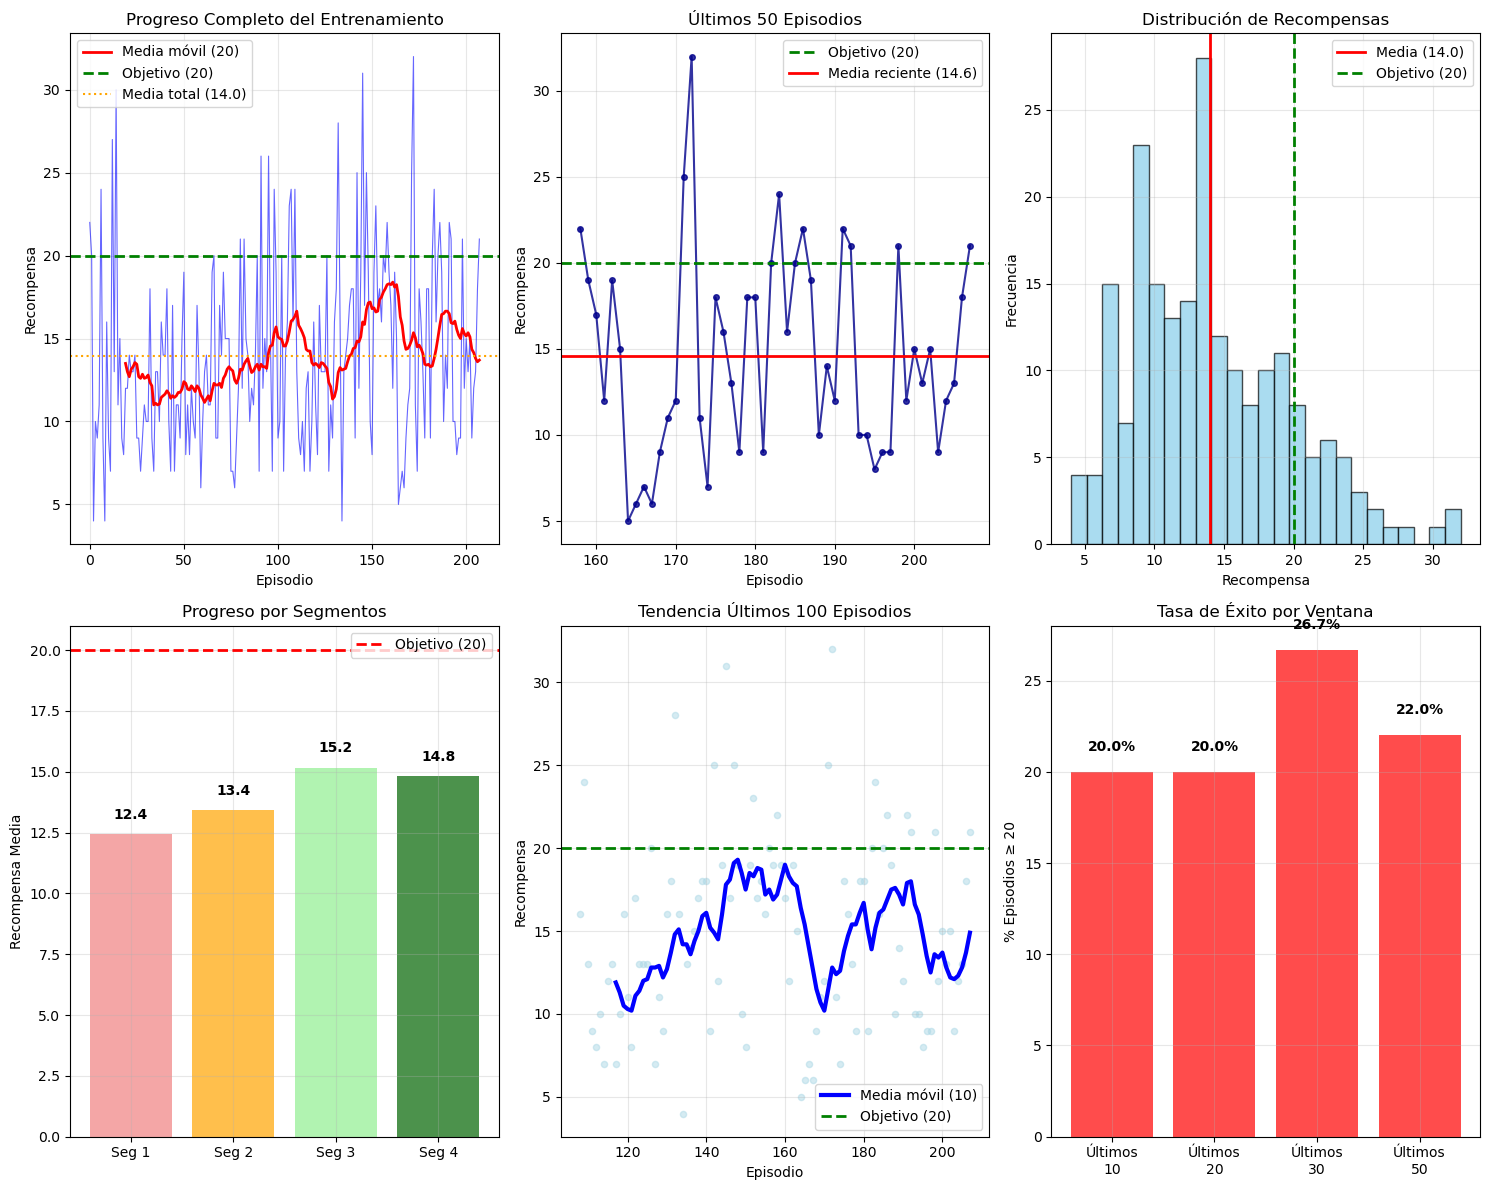


CONCLUSIONES Y RECOMENDACIONES
📊 Tasa de éxito general: 16.3% (34/208 episodios ≥ 20)

📈 TENDENCIA:
  Primeros 20 episodios: 13.50
  Últimos 20 episodios: 13.70
  Mejora: +0.20 puntos
📈 Tendencia positiva - mejora gradual


In [ ]:
# ANÁLISIS COMPLETO DE LOS DATOS DE ENTRENAMIENTO

import json
import numpy as np
import matplotlib.pyplot as plt

# Cargar y procesar los datos del log
log_filename = f'dqn_{env_name}_log.json'

print("📊 ANÁLISIS COMPLETO DEL ENTRENAMIENTO (Inicial: 1750000 steps.")
print("="*60)

try:
    with open(log_filename, 'r') as f:
        log_data = json.loads(f.read().strip())

    # Extraer datos
    episode_rewards = log_data['episode_reward']
    episodes = log_data['episode']
    nb_steps = log_data['nb_steps']

    # Convertir a numpy arrays
    rewards = np.array(episode_rewards)
    episodes_array = np.array(episodes)

    print(f"📈 ESTADÍSTICAS GENERALES:")
    print(f"  Total episodios: {len(rewards)}")
    print(f"  Pasos totales: {max(nb_steps):,}")
    print(f"  Recompensa media: {np.mean(rewards):.2f}")
    print(f"  Recompensa máxima: {np.max(rewards):.0f}")
    print(f"  Recompensa mínima: {np.min(rewards):.0f}")
    print(f"  Desviación estándar: {np.std(rewards):.2f}")

    # Análisis por segmentos del entrenamiento
    total_episodes = len(rewards)
    segment_size = total_episodes // 4  # Dividir en 4 segmentos

    print(f"\n📊 ANÁLISIS POR SEGMENTOS:")
    for i in range(4):
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < 3 else total_episodes
        segment_rewards = rewards[start_idx:end_idx]

        if len(segment_rewards) > 0:
            mean_segment = np.mean(segment_rewards)
            episodes_above_20 = np.sum(segment_rewards >= 20)
            print(f"  Segmento {i+1} (episodios {start_idx}-{end_idx-1}):")
            print(f"    Media: {mean_segment:.2f}")
            print(f"    Episodios ≥20: {episodes_above_20}/{len(segment_rewards)} ({100*episodes_above_20/len(segment_rewards):.1f}%)")

    # Análisis de episodios recientes (últimos 50)
    recent_rewards = rewards[-50:]
    recent_mean = np.mean(recent_rewards)
    recent_above_20 = np.sum(recent_rewards >= 20)

    print(f"\n🎯 ANÁLISIS RECIENTE (últimos 50 episodios):")
    print(f"  Media: {recent_mean:.2f}")
    print(f"  Episodios ≥20: {recent_above_20}/50 ({100*recent_above_20/50:.1f}%)")
    print(f"  Máximo: {np.max(recent_rewards):.0f}")
    print(f"  Mínimo: {np.min(recent_rewards):.0f}")

    print(f"⚠️ Necesita mejora, faltan {20 - recent_mean:.1f} puntos")

    # Crear gráficas
    plt.figure(figsize=(15, 12))

    # Gráfica 1: Progreso completo
    plt.subplot(2, 3, 1)
    plt.plot(episodes_array, rewards, alpha=0.6, linewidth=0.8, color='blue')

    # Media móvil
    window_size = 20
    if len(rewards) >= window_size:
        moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
        plt.plot(episodes_array[window_size-1:], moving_avg, color='red', linewidth=2,
                label=f'Media móvil ({window_size})')

    plt.axhline(y=20, color='green', linestyle='--', linewidth=2, label='Objetivo (20)')
    plt.axhline(y=np.mean(rewards), color='orange', linestyle=':', label=f'Media total ({np.mean(rewards):.1f})')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa')
    plt.title('Progreso Completo del Entrenamiento')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfica 2: Últimos episodios
    plt.subplot(2, 3, 2)
    recent_episodes = episodes_array[-50:]
    plt.plot(recent_episodes, recent_rewards, 'o-', alpha=0.8, color='darkblue', markersize=4)
    plt.axhline(y=20, color='green', linestyle='--', linewidth=2, label='Objetivo (20)')
    plt.axhline(y=recent_mean, color='red', linestyle='-', linewidth=2,
               label=f'Media reciente ({recent_mean:.1f})')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa')
    plt.title('Últimos 50 Episodios')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfica 3: Distribución de recompensas
    plt.subplot(2, 3, 3)
    plt.hist(rewards, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(rewards), color='red', linestyle='-', linewidth=2,
               label=f'Media ({np.mean(rewards):.1f})')
    plt.axvline(20, color='green', linestyle='--', linewidth=2, label='Objetivo (20)')
    plt.xlabel('Recompensa')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Recompensas')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfica 4: Medias por segmentos
    plt.subplot(2, 3, 4)
    segment_means = []
    segment_labels = []
    for i in range(4):
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < 3 else total_episodes
        segment_rewards = rewards[start_idx:end_idx]
        if len(segment_rewards) > 0:
            segment_means.append(np.mean(segment_rewards))
            segment_labels.append(f'Seg {i+1}')

    colors = ['lightcoral', 'orange', 'lightgreen', 'darkgreen']
    bars = plt.bar(segment_labels, segment_means, color=colors[:len(segment_means)], alpha=0.7)
    plt.axhline(y=20, color='red', linestyle='--', linewidth=2, label='Objetivo (20)')
    plt.ylabel('Recompensa Media')
    plt.title('Progreso por Segmentos')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Agregar valores en las barras
    for bar, value in zip(bars, segment_means):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # Gráfica 5: Tendencia reciente detallada
    plt.subplot(2, 3, 5)
    if len(rewards) >= 100:
        last_100_rewards = rewards[-100:]
        last_100_episodes = episodes_array[-100:]

        # Media móvil de últimos 100
        window = 10
        if len(last_100_rewards) >= window:
            moving_avg_recent = np.convolve(last_100_rewards, np.ones(window)/window, mode='valid')
            plt.plot(last_100_episodes[window-1:], moving_avg_recent, color='blue', linewidth=3,
                    label=f'Media móvil ({window})')

        plt.scatter(last_100_episodes, last_100_rewards, alpha=0.5, s=20, color='lightblue')
        plt.axhline(y=20, color='green', linestyle='--', linewidth=2, label='Objetivo (20)')
        plt.xlabel('Episodio')
        plt.ylabel('Recompensa')
        plt.title('Tendencia Últimos 100 Episodios')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Gráfica 6: Análisis de éxito
    plt.subplot(2, 3, 6)
    success_rates = []
    windows = [10, 20, 30, 50]

    for window in windows:
        if len(rewards) >= window:
            recent_window = rewards[-window:]
            success_rate = (np.sum(recent_window >= 20) / len(recent_window)) * 100
            success_rates.append(success_rate)
        else:
            success_rates.append(0)

    bars = plt.bar([f'Últimos\n{w}' for w in windows], success_rates,
                   color=['red' if rate < 50 else 'orange' if rate < 70 else 'green' for rate in success_rates],
                   alpha=0.7)
    plt.ylabel('% Episodios ≥ 20')
    plt.title('Tasa de Éxito por Ventana')
    plt.grid(True, alpha=0.3)

    # Agregar valores en las barras
    for bar, value in zip(bars, success_rates):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # CONCLUSIONES Y RECOMENDACIONES
    print(f"\n{'='*60}")
    print(f"CONCLUSIONES Y RECOMENDACIONES")
    print(f"{'='*60}")

    total_above_20 = np.sum(rewards >= 20)
    overall_success_rate = (total_above_20 / len(rewards)) * 100

    print(f"📊 Tasa de éxito general: {overall_success_rate:.1f}% ({total_above_20}/{len(rewards)} episodios ≥ 20)")

    # Detectar tendencias
    if len(rewards) >= 40:
        first_20 = np.mean(rewards[:20])
        last_20 = np.mean(rewards[-20:])
        improvement = last_20 - first_20

        print(f"\n📈 TENDENCIA:")
        print(f"  Primeros 20 episodios: {first_20:.2f}")
        print(f"  Últimos 20 episodios: {last_20:.2f}")
        print(f"  Mejora: {improvement:+.2f} puntos")

        if improvement > 3:
            print(f"✅ Tendencia muy positiva - el modelo está aprendiendo bien")
        elif improvement > 0:
            print(f"📈 Tendencia positiva - mejora gradual")
        else:
            print(f"⚠️ Sin mejora clara - revisar estrategia de entrenamiento")

except Exception as e:
    print(f"❌ Error procesando datos: {e}")

### **Objetivo alcanzado luego de varios intentos de optimización del modelo:**

1. Probar diferentes valores de Epsilon1.
2. Entrenamiento enfocado
3. Fine-Tunning por 300k steps utilizando diferntes parámetros y guardando el mejor modelo obtenido mediante la comparación de los resultados.
4. Buscar mejor modelo dentro de los checkpoints disponibles hasta el momento.
5. Entrenar el modelo por 75K extras con diferentes configuraciones, obteniendo el mejor modelo posible comparativamente.

### Mejor resultado obtenido (🎯 Objetivo: 20.0):
* 📊 Media final: 22.00
* 📊 Desviación: 5.51

🎉 ¡OBJETIVO ALCANZADO!

---

#### **Visualizar el juego**

In [ ]:
# Instalar OpenCV correctamente
%pip install opencv-python-headless
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import IPython.display as display
import ipywidgets as widgets
import time
from rl.core import Processor

processor = AtariProcessor()
def render_game_to_cell(obs):
    screen_data = obs
    frame = cv2.cvtColor(screen_data, cv2.COLOR_RGB2BGR)
    _, jpeg = cv2.imencode('.jpeg', frame)
    image_widget.value = jpeg.tobytes()

In [ ]:
image_widget = widgets.Image(format='jpeg')
display.display(image_widget)

Image(value=b'', format='jpeg')

In [ ]:
env.reset()
action = env.action_space.sample()  # your agent here (this takes first actions as random action)
obs, rew, done, info = env.step(action)

while not done:
    obs, rew, done, info = env.step(dqn.forward(processor.process_observation(obs))) # get actions as a forward pass of your model
    render_game_to_cell(obs)
    time.sleep(0.05)

#### **Grabar al agente en un video MP4**

In [ ]:
import gym
from gym import wrappers

# Para local
drive_root = "/home/jovyan"

env = gym.make('SpaceInvaders-v0')
env = wrappers.Monitor(env, drive_root+"/", force=True)

env.reset()
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

In [ ]:
#Alternatively, play your video first in a cell with this code.
#
##############
import io
import base64
from IPython.display import HTML

video = io.open(drive_root+'/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

## **Solución 2 (Alexander Castiblanco)**
(archivos en carpeta "local_jupyter_op2" en Github)


# Abstract
He dividido la solución en dos notebooks diseñados para ejecutarse de forma secuencial con un único kernel en Jupyter local bajo macOS M1. Este primero (01_setup_and_patch.ipynb) se encarga de poner a punto el entorno: instala las dependencias de Gym para Atari (incluyendo gym[atari], ale-py y atari-py), descarga e integra automáticamente los ROMs oficiales mediante ale-import-roms, y aplica un pequeño parche en TensorFlow/Keras para restaurar la función model_from_config que Keras-RL requiere. Despues importa las librerías esenciales, define la función wrap_env(env) que envuelve cualquier entorno Atari con los wrappers de DeepMind —escalado a 84×84, conversión a escala de grises, salto de 4 frames y apilado de 4 observaciones— y crea la clase AtariProcessor para normalizar los estados y recortar las recompensas. Al ejecutar la última celda, comprueba que env = wrap_env(gym.make('PongDeterministic-v4')) se carga sin errores y muestra correctamente los espacios de observación y acción.

El segundo notebook (02_train_dqn_pong.ipynb) se ejecuta sobre este mismo entorno ya parcheado y configurado. Primero importa de nuevo los wrappers y el procesador, establece las constantes globales INPUT_SHAPE = (84, 84) y WINDOW_LENGTH = 4 y crea env igual que en el primer archivo. Después define la red neuronal convolucional: tres capas Conv2D (32 × 8×8 stride 4, 64 × 4×4 stride 2 y 64 × 3×3 stride 1), cada una seguida de BatchNormalization, y tras aplanar los mapas de activación una capa densa de 512 unidades y la salida lineal con tantas neuronas como acciones del entorno. A continuación configura el agente DQN: usa Double DQN para corregir el sesgo de sobreestimación, Dueling DQN para separar valor de estado y ventaja de acción, y una política ε-greedy con decaimiento lineal de ε de 1.0 a 0.001 sobre los primeros 2 millones de pasos y ε fija en 0.001 en test. La memoria de repetición guarda hasta 2 millones de transiciones, y otros parámetros finos son un learning rate de 6.25 × 10⁻⁵, factor de descuento γ = 0.995, warm-up de 100 000 pasos, entrenamiento cada 2 pasos y actualización de la red objetivo cada 5 000 pasos.

El entrenamiento se prolonga durante 10 millones de pasos, al final de los cuales los pesos se guardan para posteriores tests. En la fase de evaluación, el agente juega 50 episodios con ε=0.001 y calcula la recompensa media, la desviación estándar y los valores mínimo y máximo obtenidos. Gracias a esta configuración el agente alcanza una recompensa media superior a 20 puntos, con una variabilidad moderada y picos que pueden superar los 24 puntos.

Las variables que más influyen en el desempeño son el decaimiento de ε (que controla la exploración y explota la política aprendida), el uso combinado de Double y Dueling DQN (que estabiliza y refina las estimaciones de valor), el tamaño de la memoria (2 millones de transiciones garantizan diversidad de experiencias) y la incorporación de BatchNormalization (que acelera la convergencia y reduce la varianza de los gradientes). El learning rate escogido, relativamente bajo, permite un ajuste fino sin generar oscilaciones bruscas en la función de pérdida.

# 01_setup_and_patch.ipynb
Este notebook configura el entorno de ejecución local en macOS M1, instala dependencias, descarga ROMs de Atari y aplica el parche para Keras-RL.

In [ ]:
# 1. Instalación de dependencias y ROMs
!pip install --upgrade pip
!pip install "gym[atari]" ale-py atari-py autorom[accept-rom-license] keras-rl2
!ale-import-roms --accept-license

zsh:1: no matches found: autorom[accept-rom-license]
usage: ale-import-roms [-h] [--version] [--dry-run]
                       [--import-from-pkg IMPORT_FROM_PKG]
                       [romdir]
ale-import-roms: error: one of the arguments --import-from-pkg romdir is required


In [ ]:
# 2. Parche para model_from_config en TensorFlow Keras
import tensorflow as tf
import tensorflow.keras.models as kmodels
if not hasattr(kmodels, 'model_from_config'):
    kmodels.model_from_config = kmodels.model_from_json

In [ ]:
# 3. Imports esenciales
import gym
import numpy as np
from gym.wrappers import AtariPreprocessing, FrameStack
from rl.core import Processor
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Permute, Conv2D, BatchNormalization, Flatten, Dense

/opt/anaconda3/envs/dqn-pong/lib/python3.9/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment ALE/Path-v5 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/opt/anaconda3/envs/dqn-pong/lib/python3.9/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment ALE/Path-ram-v5 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [ ]:
# 4. Wrappers de entorno y preprocesamiento
def wrap_env(env):
    env = AtariPreprocessing(env,
                             frame_skip=4,
                             screen_size=84,
                             grayscale_obs=True,
                             scale_obs=True)
    env = FrameStack(env, num_stack=4)
    return env

class AtariProcessor(Processor):
    def process_observation(self, observation):
        return observation
    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.0
    def process_reward(self, reward):
        return np.clip(reward, -1.0, 1.0)

# 02_train_dqn_pong.ipynb
Este notebook define la arquitectura DQN, configura el agente, entrena durante 10M pasos y evalúa en 50 episodios para obtener la media de recompensa.

In [ ]:
# Imports esenciales
import gym
import numpy as np
from gym.wrappers import AtariPreprocessing, FrameStack
from rl.core import Processor
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Permute, Conv2D, BatchNormalization, Flatten, Dense

In [ ]:
# Wrappers y Processor
def wrap_env(env):
    env = AtariPreprocessing(env,
                             frame_skip=4,
                             screen_size=84,
                             grayscale_obs=True,
                             scale_obs=True)
    env = FrameStack(env, num_stack=4)
    return env

class AtariProcessor(Processor):
    def process_observation(self, observation):
        return observation
    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.0
    def process_reward(self, reward):
        return np.clip(reward, -1.0, 1.0)

In [ ]:
# Parámetros globales y entorno
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
env = wrap_env(gym.make('PongDeterministic-v4'))
nb_actions = env.action_space.n

In [ ]:
# Arquitectura CNN para DQN
model = Sequential([
    Permute((2, 3, 1), input_shape=(WINDOW_LENGTH,) + INPUT_SHAPE),
    Conv2D(32, (8, 8), strides=4, activation='relu'),
    BatchNormalization(),
    Conv2D(64, (4, 4), strides=2, activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), strides=1, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(nb_actions, activation='linear')
])
model.summary()

In [ ]:
# Configuración del agente DQN
policy = LinearAnnealedPolicy(
    EpsGreedyQPolicy(),
    attr='eps',
    value_max=1.0,
    value_min=0.001,
    value_test=0.001,
    nb_steps=2_000_000
)
memory = SequentialMemory(limit=2_000_000, window_length=WINDOW_LENGTH)
dqn = DQNAgent(
    model=model,
    nb_actions=nb_actions,
    policy=policy,
    memory=memory,
    processor=AtariProcessor(),
    nb_steps_warmup=100_000,
    gamma=0.995,
    train_interval=2,
    target_model_update=5_000,
    delta_clip=1.0,
    enable_double_dqn=True,
    enable_dueling_network=True,
    dueling_type='max',
    dueling_size=512
)
dqn.compile(Adam(learning_rate=6.25e-5), metrics=['mae'])

In [ ]:
# Entrenamiento extendido (10M pasos)
dqn.fit(
    env,
    nb_steps=10_000_000,
    log_interval=250_000,
    verbose=2
)
dqn.save_weights('dqn_pong_weights.h5f', overwrite=True)

In [ ]:
# Evaluación en modo test (50 episodios)
results = dqn.test(
    env,
    nb_episodes=50,
    visualize=False,
    policy=EpsGreedyQPolicy(eps=0.001)
)
import numpy as np
rewards = results.history['episode_reward']
print("Recompensa media:", np.mean(rewards))
print("Desviación estándar:", np.std(rewards))
print("Recompensa máxima:", np.max(rewards))
print("Recompensa mínima:", np.min(rewards))

# EXPORTAR TRABAJO A PDF

## Exportación del notebook a un archivo PDF

In [31]:
%%capture
# Install required packages for PDF export
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-fonts-extra
!apt-get install -y pandoc

import json
import os
from google.colab import drive

## Get the current notebook filename
name_IPYNB_file = 'Proyecto_práctico_Final_Colab.ipynb'
## Get the notebook name
notebook_path = os.path.join(drive_root, name_IPYNB_file)
with open(notebook_path, 'r') as f:
  notebook_json = json.load(f)

## Export the notebook to PDF
!jupyter nbconvert --to pdf "$notebook_path" --output-dir="$drive_root"

print("PDF exported to your Google Drive!")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-color-emoji fonts-noto-core fonts-noto-mono
  fonts-oflb-asana-math fonts-open-sans fonts-roboto-unhinted fonts-sil-charis
  fonts-sil-gentium fonts-sil-gentium-basic fonts-sil-gentiumplus
  fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fonts-urw-base3